In [370]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics
from IPython import get_ipython

%matplotlib notebook


def nextplot():
    inNotebook = "IPKernelApp" in get_ipython().config
    if inNotebook:
        plt.figure()  # this creates a new plot
    else:
        plt.clf()  # and this clears the current one

# Load the data

In [371]:
data = scipy.io.loadmat("data/spamData.mat") # matlab data type
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]

print(N) # examples (3065)
print(D) # features (57)

Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total", # shouldn't this be something else..?
    ]
)

3065
57


# 1. Dataset Statistics

In [372]:
# look some dataset statistics
# statistics in this case are minmax, sum, mean, variance, skewness, kurtosis
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [373]:
scipy.stats.describe(y) # same stats as above for y

DescribeResult(nobs=3065, minmax=(0, 1), mean=0.39738988580750406, variance=0.23954932085067238, skewness=0.41936632478193103, kurtosis=-1.824131885638896)

## Absolute and relative values together

<IPython.core.display.Javascript object>


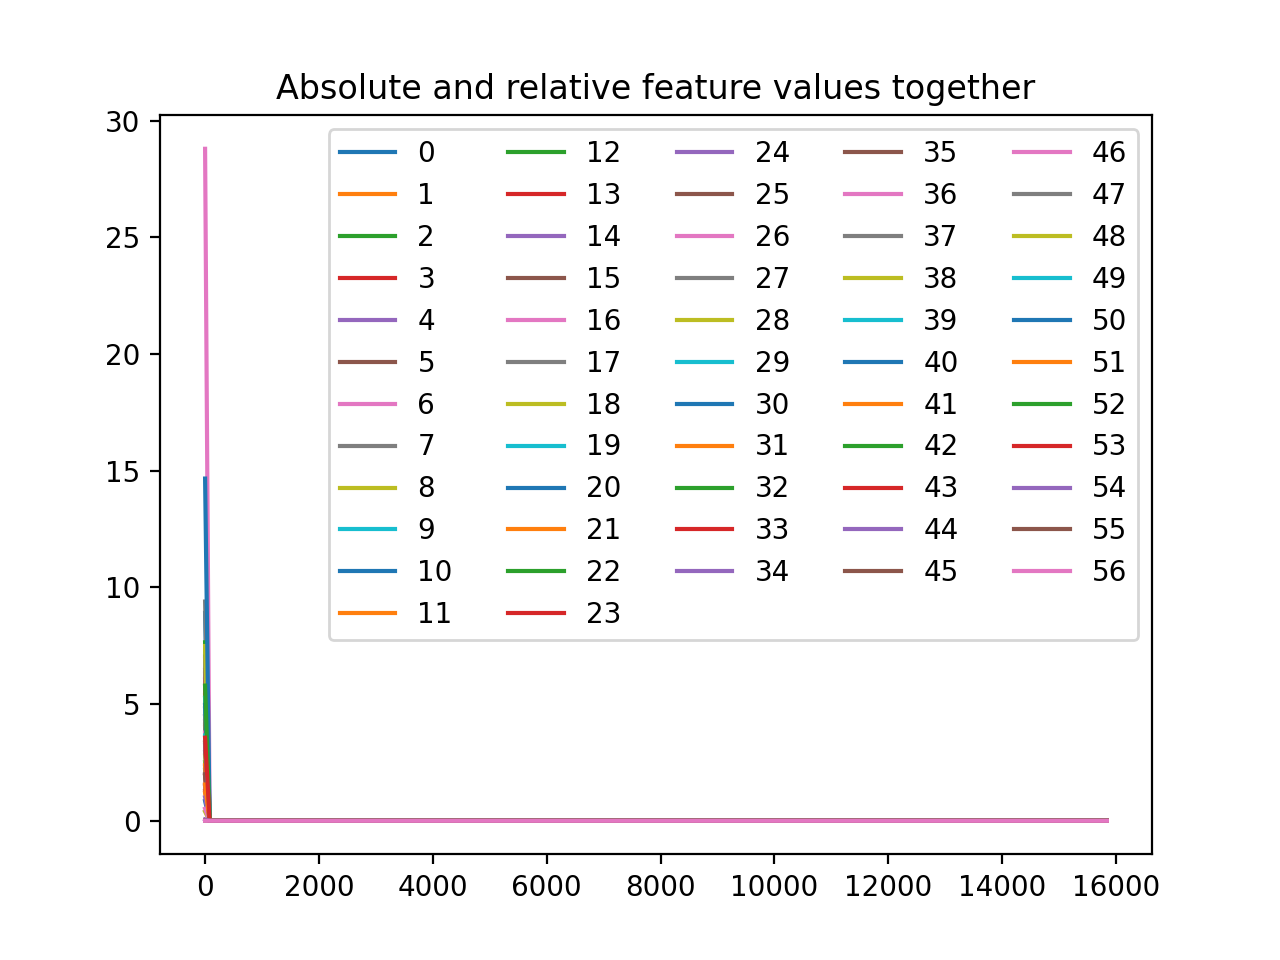

Text(0.5, 1.0, 'Absolute and relative feature values together')

In [374]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('Absolute and relative feature values together')

## only absolute values

<IPython.core.display.Javascript object>


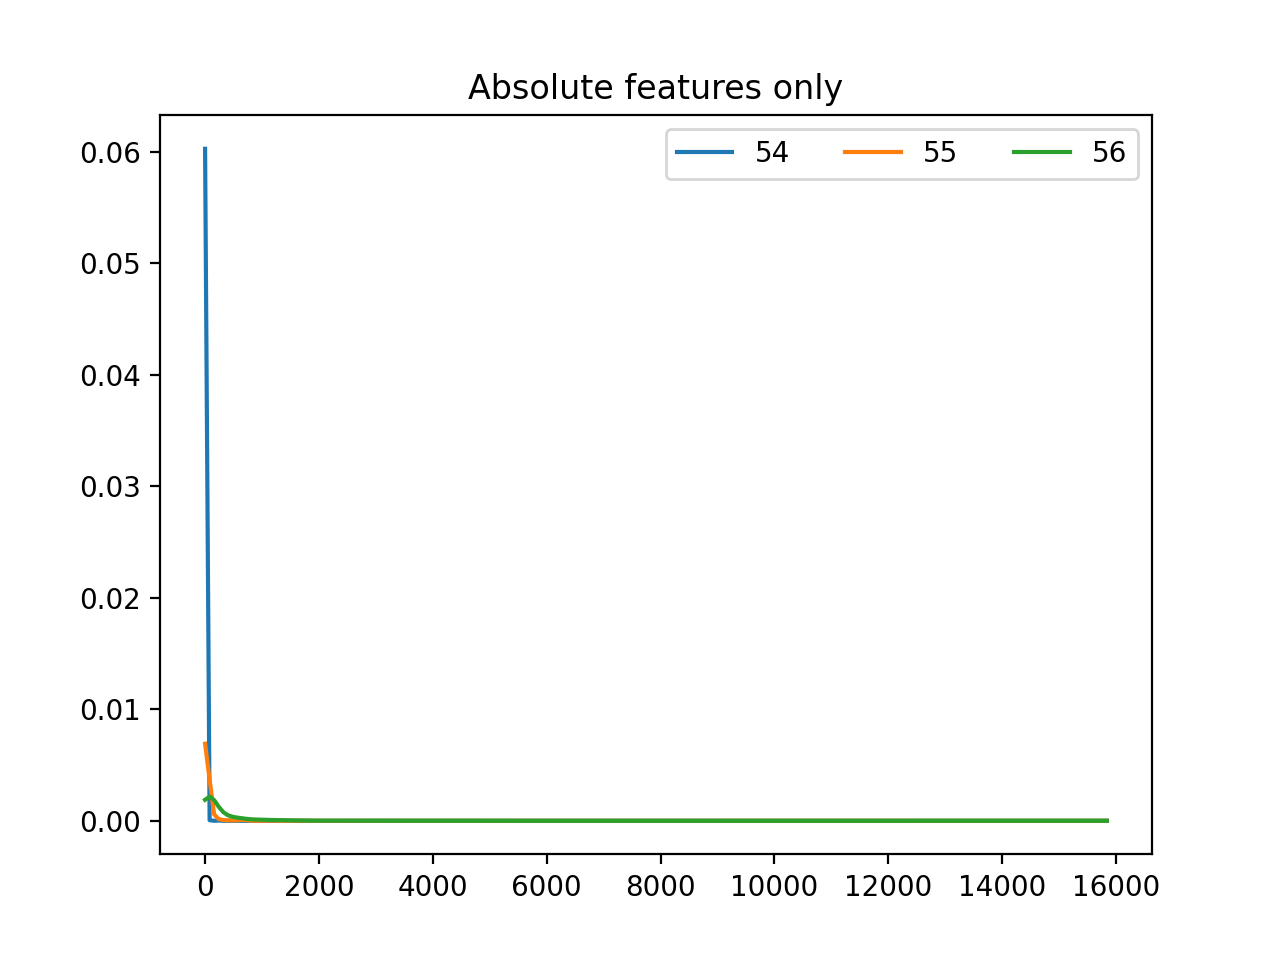

Text(0.5, 1.0, 'Absolute features only')

In [375]:
# plot the distribution of all features (all absolute values)
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3, D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('Absolute features only')

## All relative values

<IPython.core.display.Javascript object>


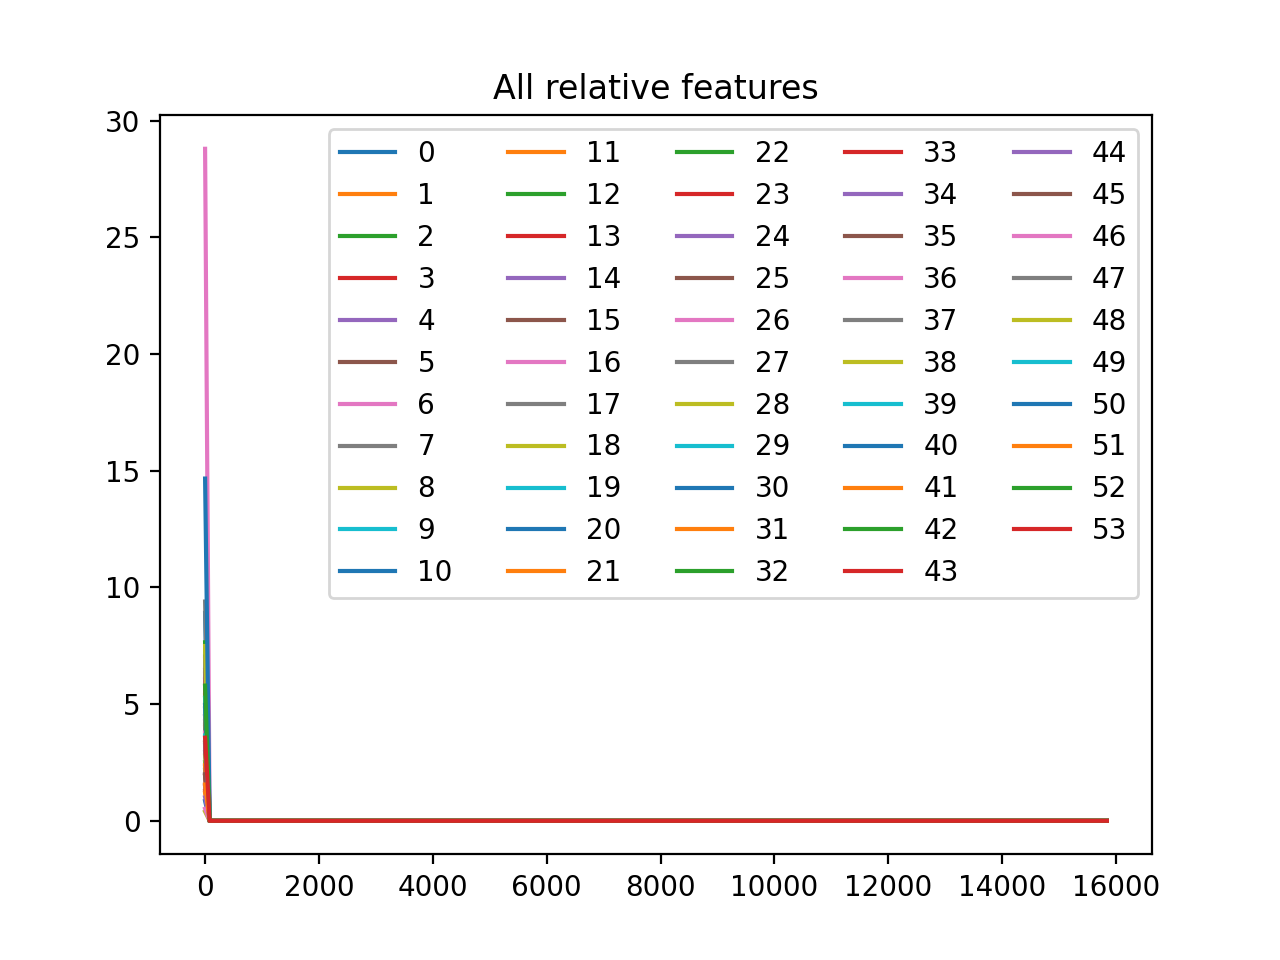

Text(0.5, 1.0, 'All relative features')

In [376]:
# plot the distribution of all features (all relative values)
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('All relative features')

<IPython.core.display.Javascript object>


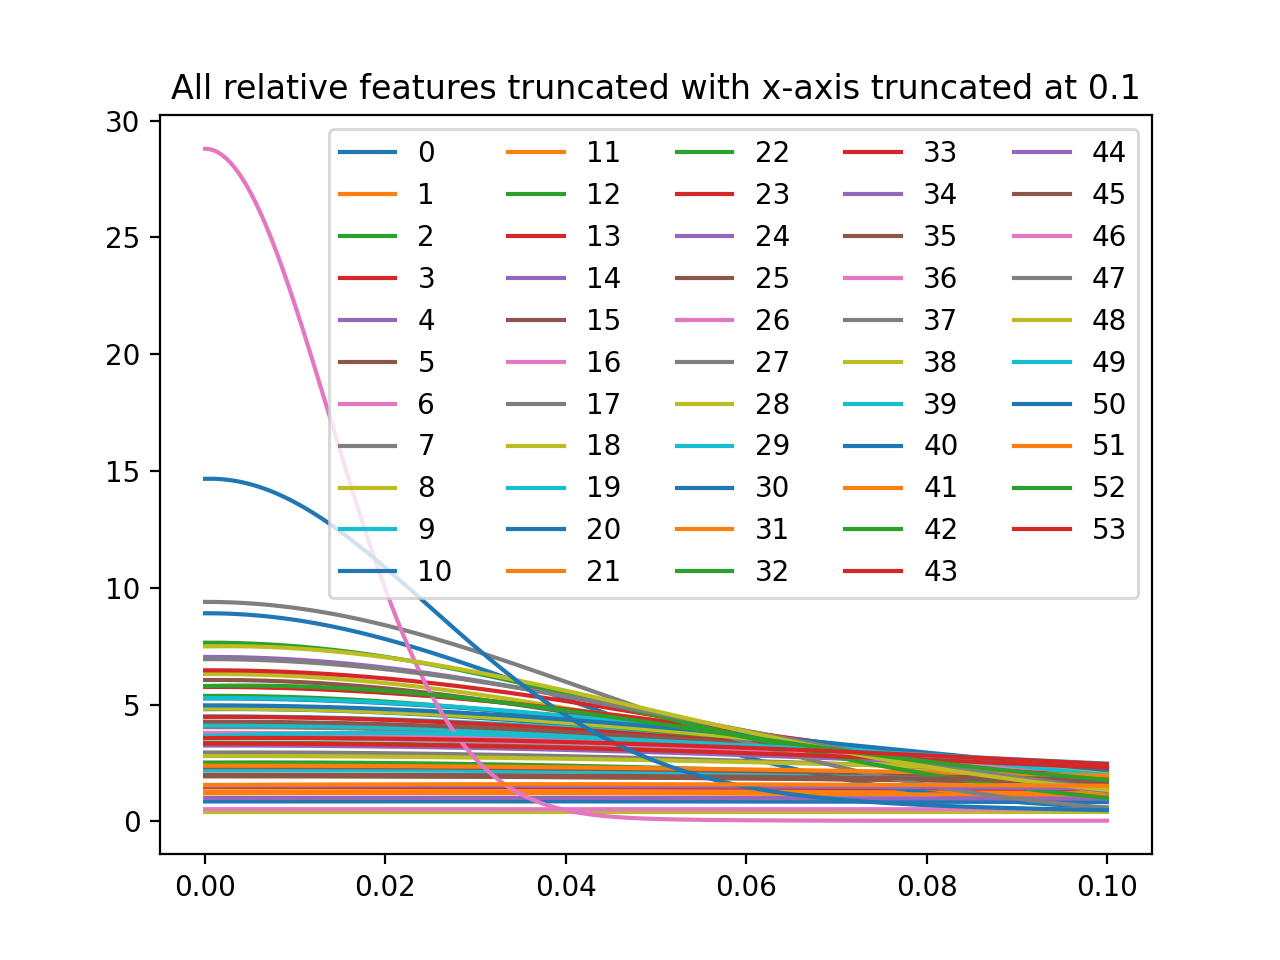

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 0.1')

In [427]:
# this plots is not really helpful; go now explore further
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 0.1, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 0.1')

<IPython.core.display.Javascript object>


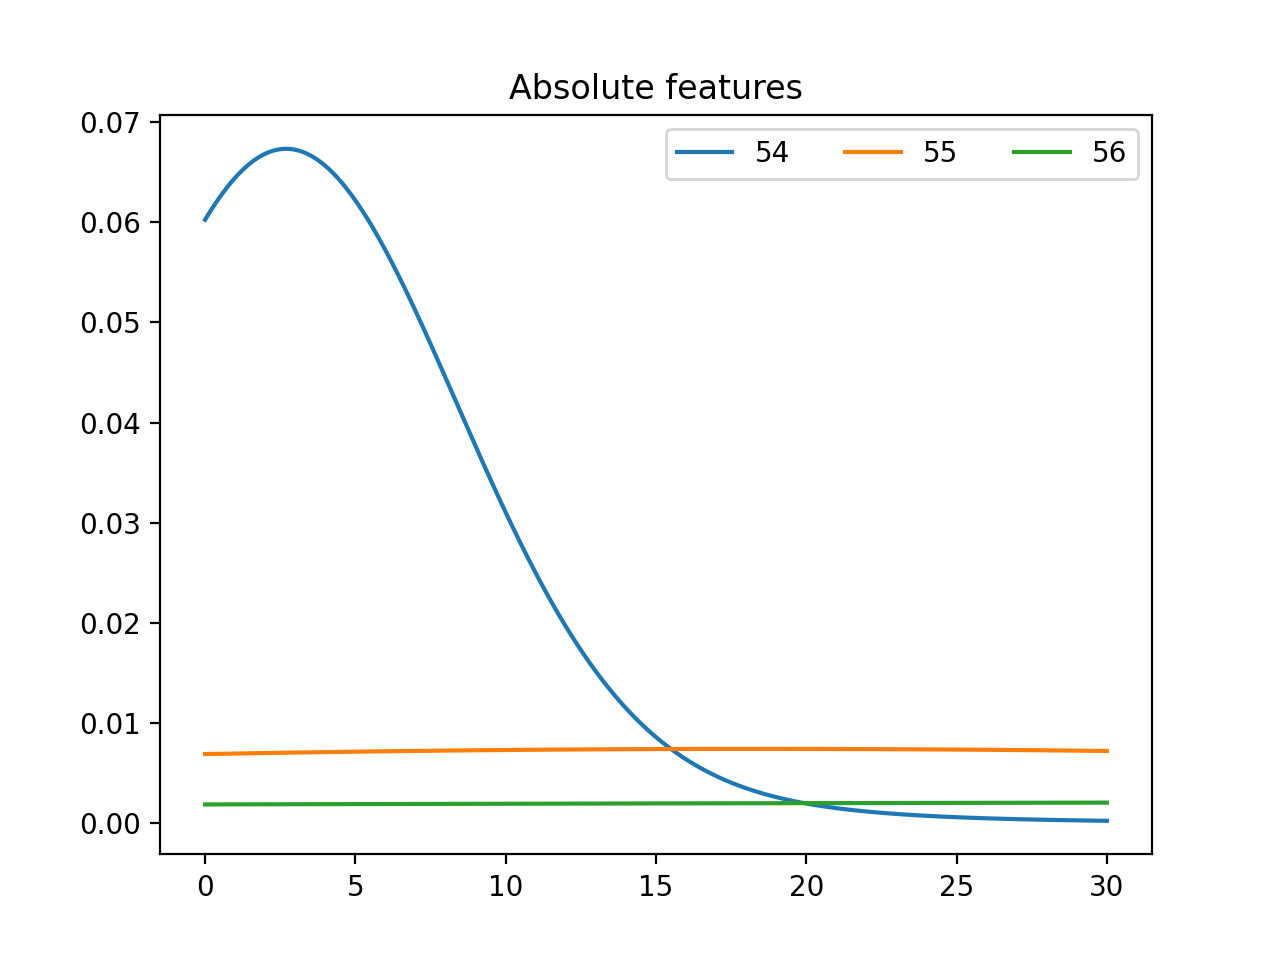

Text(0.5, 1.0, 'Absolute features')

In [428]:
# this plots is not really helpful; go now explore further
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]

xs = np.linspace(0, 30, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3, D):
    plt.plot(xs, densities[j](xs), label=j) # or j
plt.legend(ncol=5)
plt.title('Absolute features')

In [429]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
Xz = (X - np.mean(X, axis=0))/np.std(X, axis=0)
Xtestz = (Xtest - X.mean(axis=0))/X.std(axis=0)

In [430]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
np.mean(Xz, axis=0)  # should be all 0 --> is close to zero 
np.var(Xz, axis=0)  # should be all 1 --> yup, equal to 1
np.mean(Xtestz, axis=0)  # what do you get here? --> as we are normalising using the training sets'
                         # mean and std. dev., we are not getting 
np.var(Xtestz, axis=0)

np.sum(Xz ** 3)  # should be: 1925261.15

1925261.1560010156

## Plotting normalised data

<IPython.core.display.Javascript object>


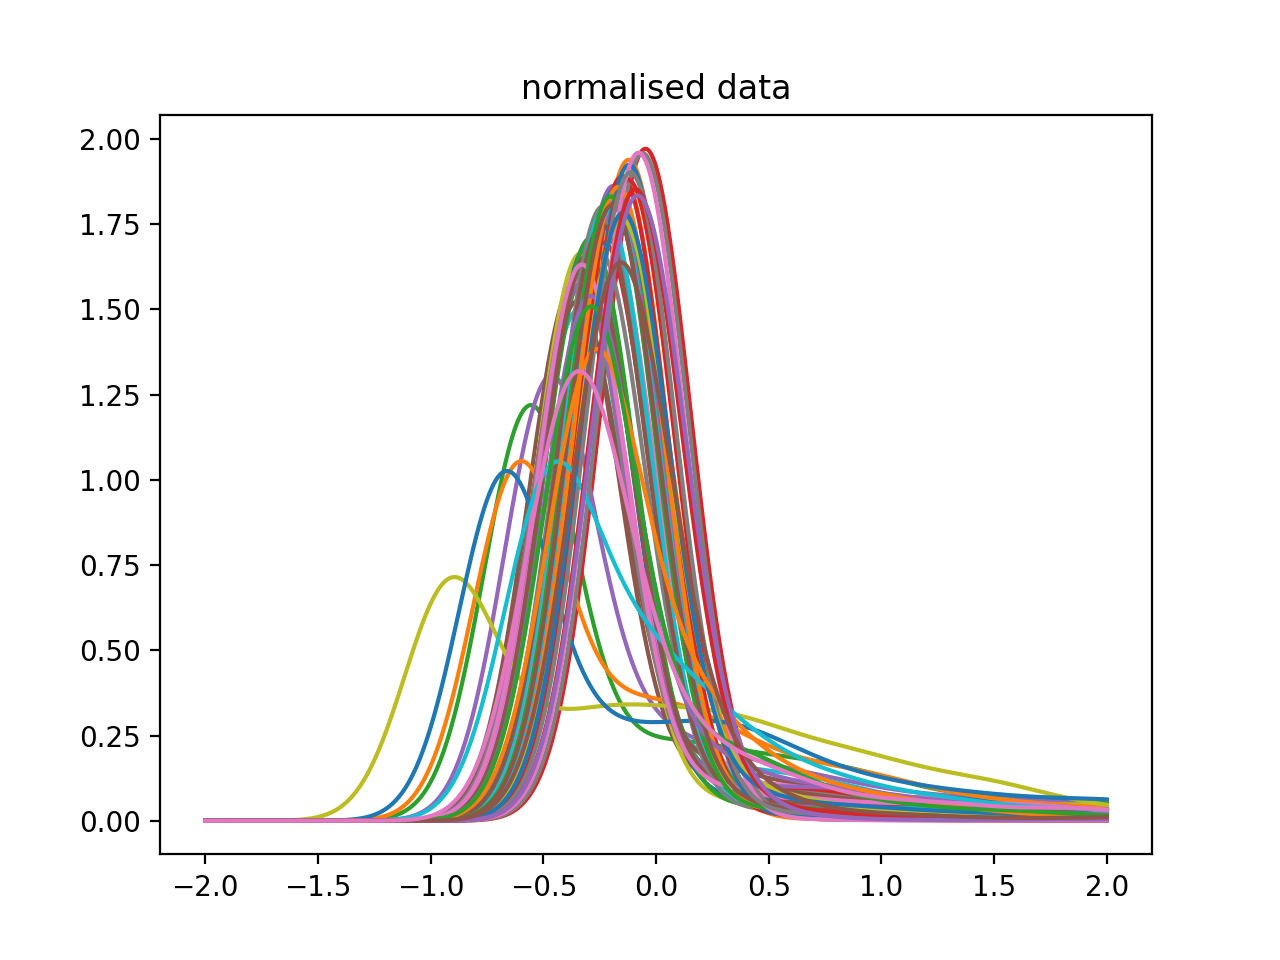

Text(0.5, 1.0, 'normalised data')

In [431]:
# Explore the normalized data
# comment by myself: there are outliers, inspect later in more detail (two different scales (relative and absolute))
# now everything is on one scale
# is right-skewed
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(-2, 2, 500) # changing the x axis scale: most of the density is between 0 and 0.4
for j in range(D):
    plt.plot(xs, densities[j](xs)) # or features[j]
#plt.legend(ncol=5)
plt.title('normalised data')
# right skewed features are the ones with absolute values

<IPython.core.display.Javascript object>


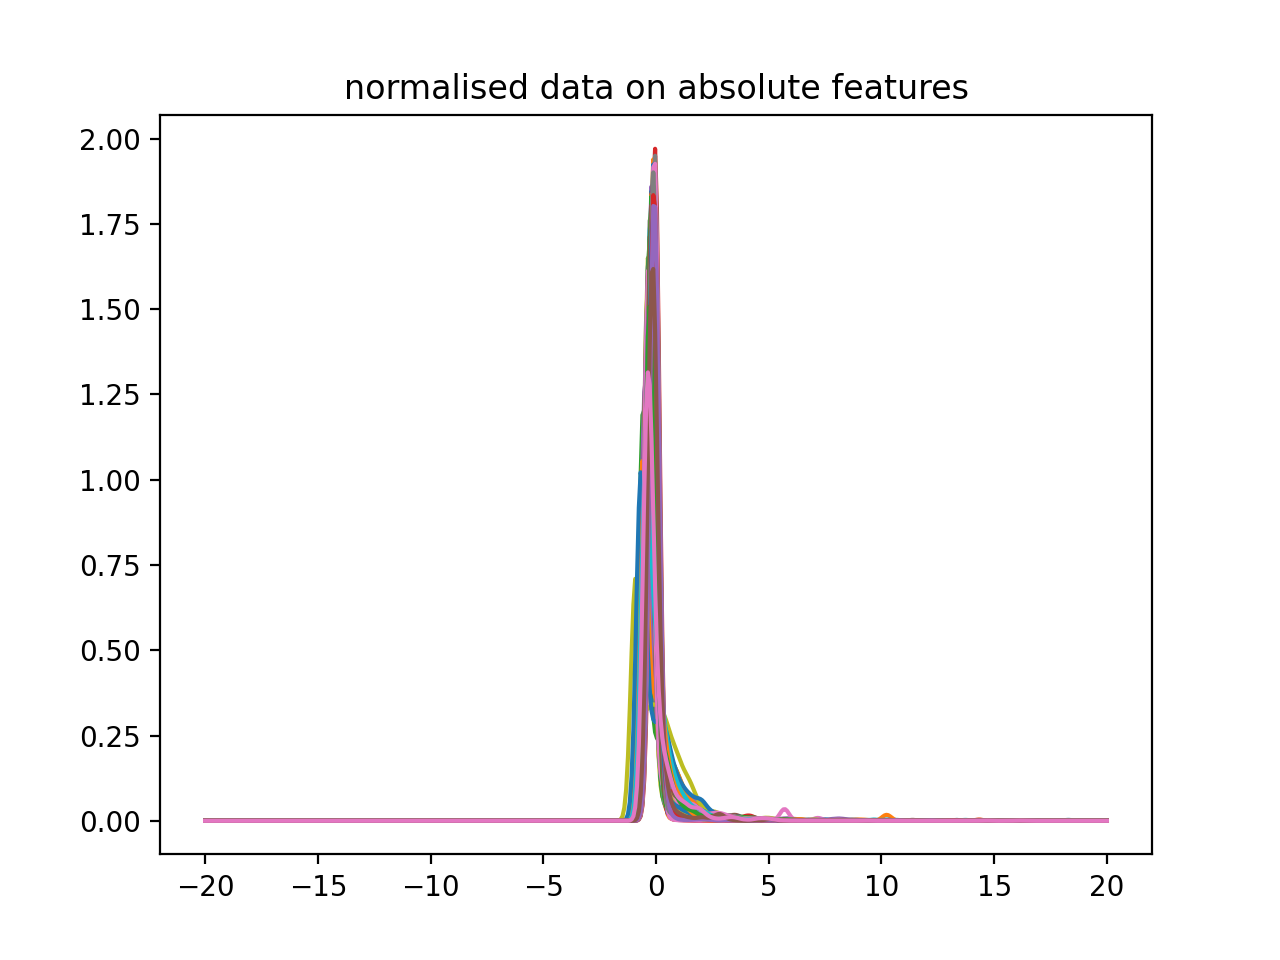

Text(0.5, 1.0, 'normalised data on absolute features')

In [432]:
# Explore the normalized data
# there are outliers, inspect later in more detail (two different scales (relative and absolute))
# now everything is on one scale is right-skewed
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(-20, 20, 500) 
for j in range(D):
    plt.plot(xs, densities[j](xs)) # or features[j]
#plt.legend(ncol=5)
plt.title('normalised data on absolute features')
# right skewed features are the ones with absolute values

# 2. Maximum Likelihood Estimation

## 2a

#### why z scores? to make the weights more interpretable. Before we also had absolute values for features 55-57 which made the weights of those not comparable with features with relative values

## Helper functions

In [383]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [384]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    return (1/(1+np.exp(-x)))

In [385]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[0.5, array([0.26894142, 0.5       , 0.73105858])]

In [386]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    return np.log(sigma(x))

In [387]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[-0.6931471805599453, array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [433]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    
    return np.sum(y * logsigma(np.dot(X, w)) + ((1-y) * logsigma(np.dot(X, -w))))

In [389]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

-47066.64166782577

In [435]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """

    return np.dot((y - sigma(np.dot(X,w))), X)

In [438]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [439]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)           # calculate values for next epoch based on updated parameter vector theta
        if values[epoch] < values[epoch + 1]:  # if last epoch was better than current (or rather: next)
            eps[epoch + 1] = eps[epoch] / 2.0  # reduce step size sharply (by 50%)
        else:
            eps[epoch + 1] = eps[epoch] * 1.05 # gradually increase step size (by 5% each epoch) if we make

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps



In [440]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return w + eps * dl(y, X, w) 

    return (objective, update)

In [441]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[47066.64166782577,
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+00,  4.629534

In [442]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

Epoch 472: f=   655.868, eps=0.010293215
Epoch 473: f=   655.841, eps=0.010807875
Epoch 474: f=   655.835, eps=0.011348269
Epoch 475: f=   656.135, eps=0.005674135
Epoch 476: f=   656.301, eps=0.002837067
Epoch 477: f=   655.760, eps=0.002978921
Epoch 478: f=   655.744, eps=0.003127867
Epoch 479: f=   655.735, eps=0.003284260
Epoch 480: f=   655.725, eps=0.003448473
Epoch 481: f=   655.716, eps=0.003620897
Epoch 482: f=   655.705, eps=0.003801941
Epoch 483: f=   655.695, eps=0.003992039
Epoch 484: f=   655.684, eps=0.004191640
Epoch 485: f=   655.672, eps=0.004401222
Epoch 486: f=   655.659, eps=0.004621284
Epoch 487: f=   655.646, eps=0.004852348
Epoch 488: f=   655.633, eps=0.005094965
Epoch 489: f=   655.619, eps=0.005349713
Epoch 490: f=   655.604, eps=0.005617199
Epoch 491: f=   655.588, eps=0.005898059
Epoch 492: f=   655.571, eps=0.006192962
Epoch 493: f=   655.554, eps=0.006502610
Epoch 494: f=   655.536, eps=0.006827741
Epoch 495: f=   655.517, eps=0.007169128
Epoch 496: f=   

<IPython.core.display.Javascript object>


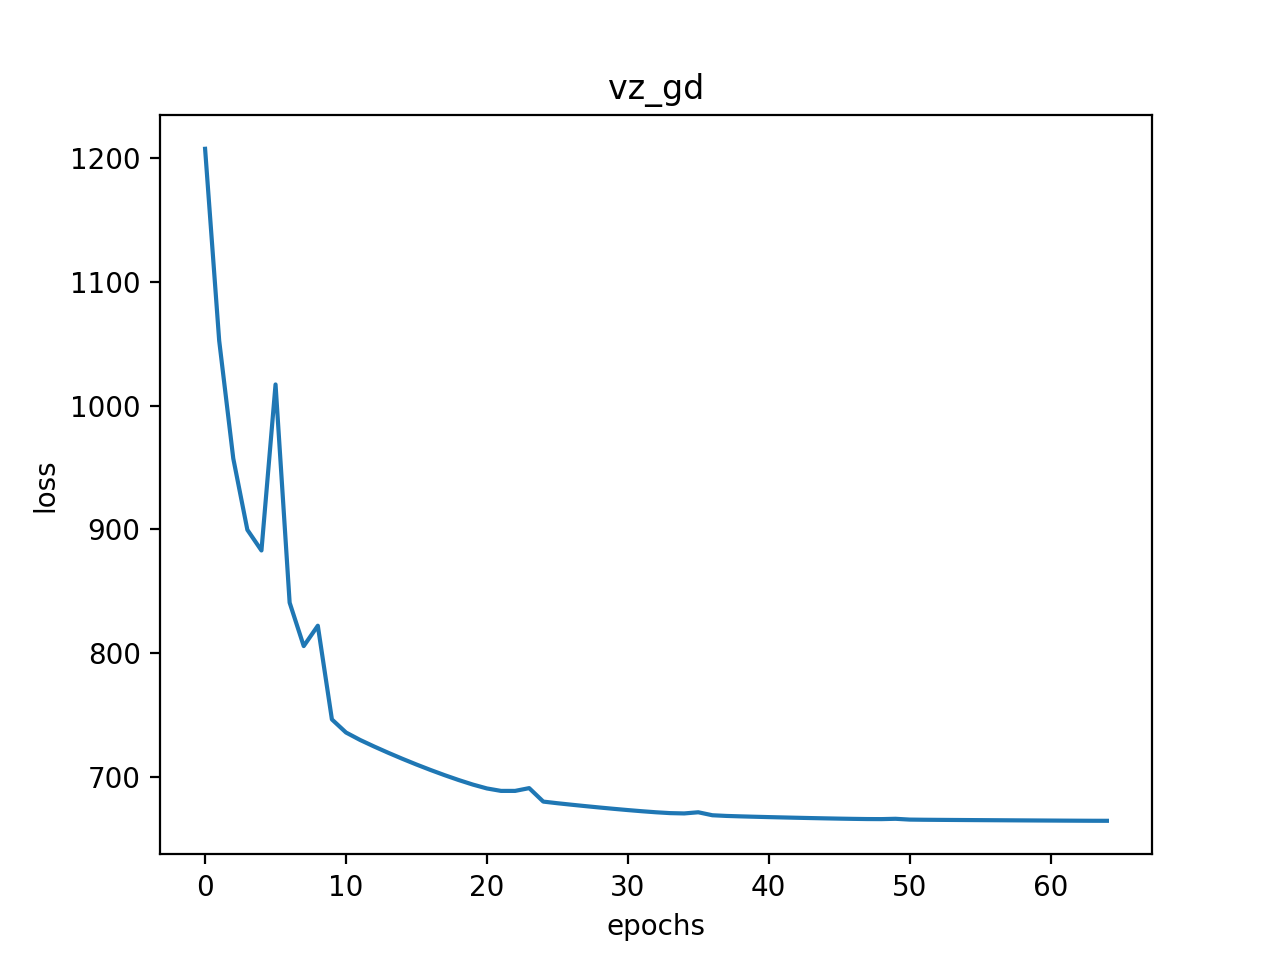

<IPython.core.display.Javascript object>


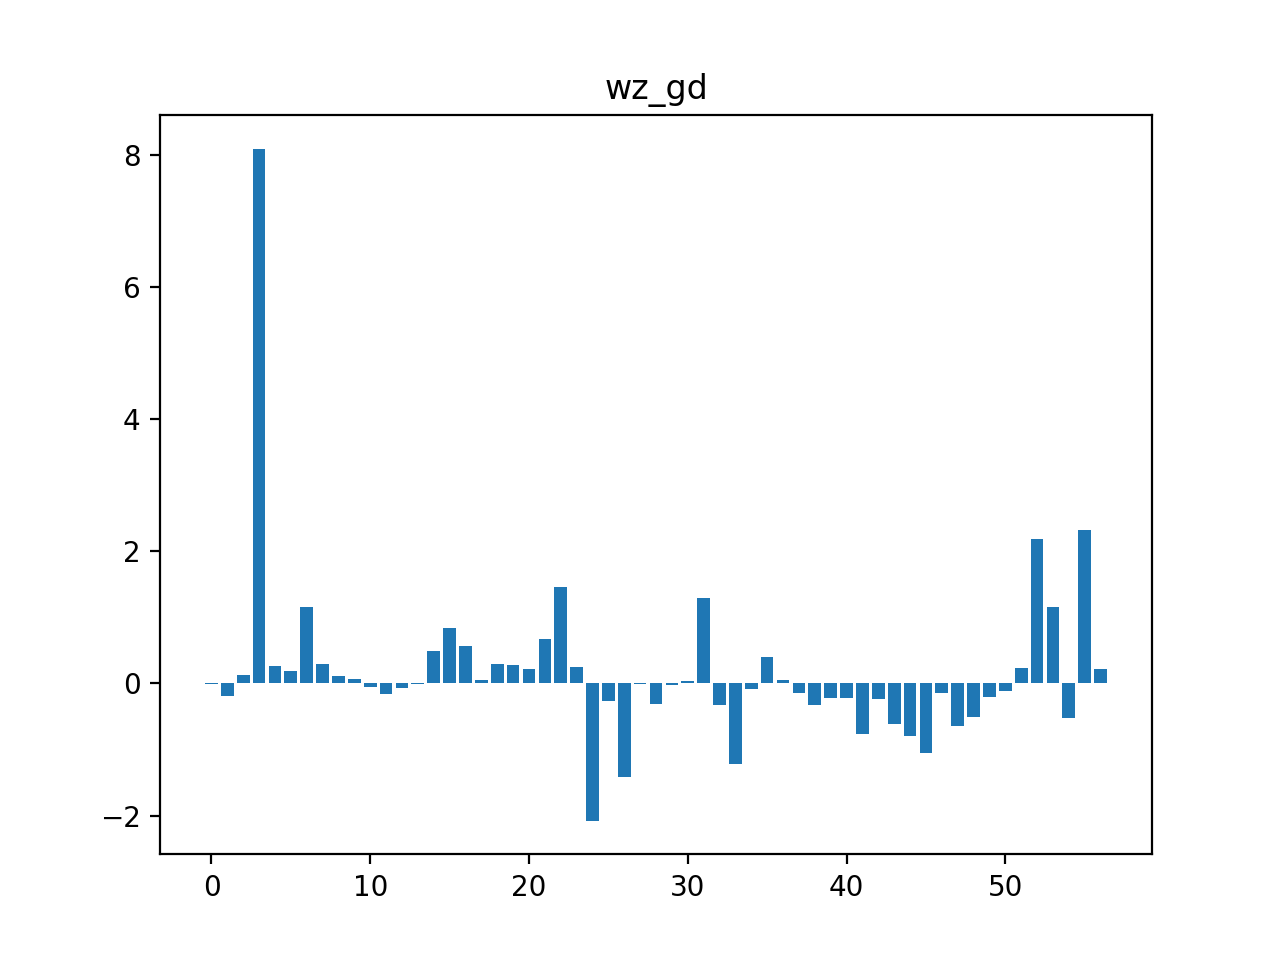

<IPython.core.display.Javascript object>


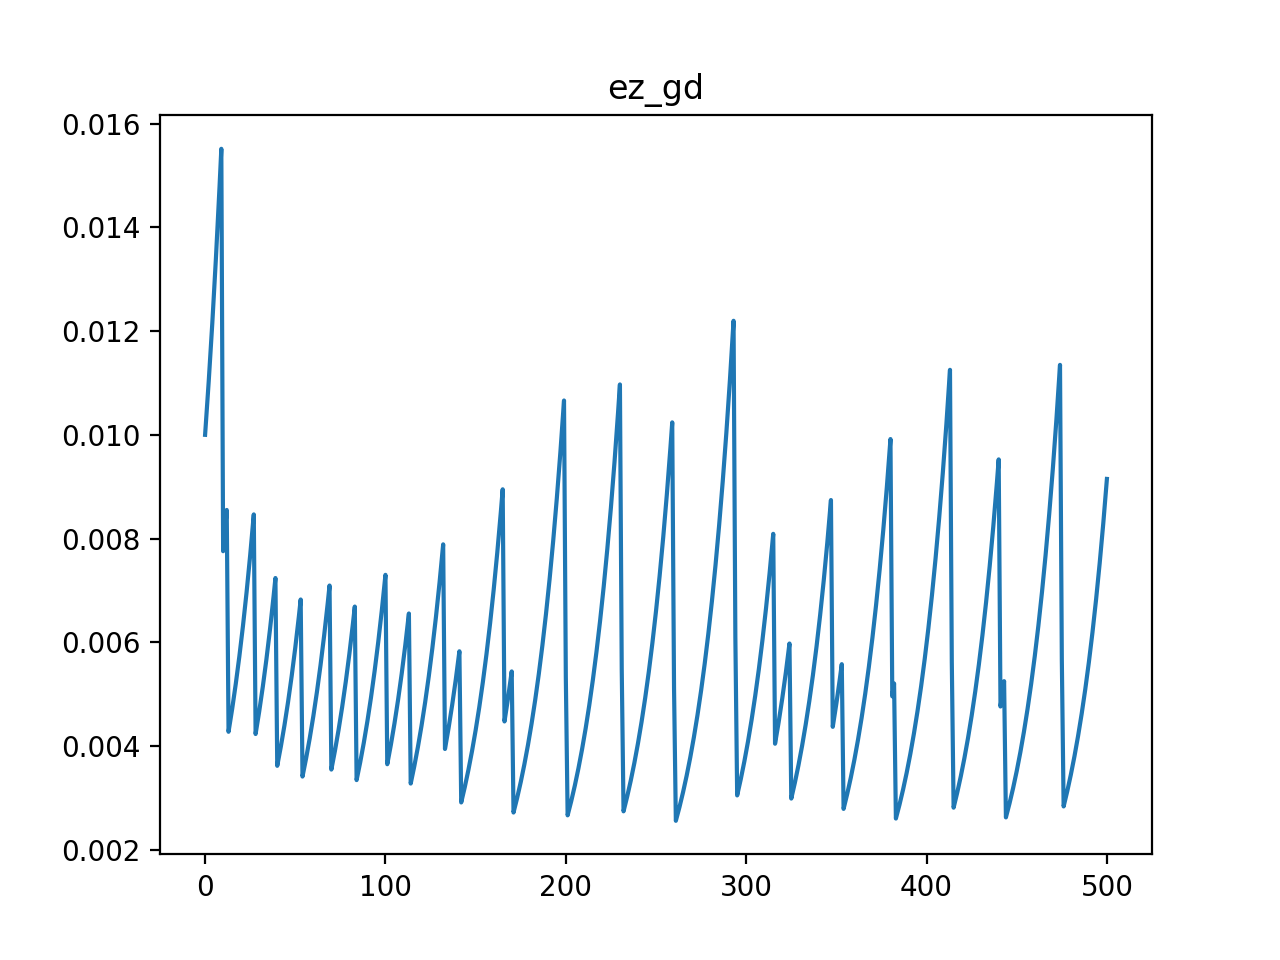

Text(0.5, 1.0, 'ez_gd')

In [443]:
# look at how gradient descent made progess

nextplot()
plt.plot(vz_gd[5:70])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('vz_gd')

nextplot()
plt.bar(range(0,57), wz_gd)
plt.title('wz_gd')

nextplot()
plt.plot(ez_gd)
plt.title('ez_gd')


## 2d Stochastic gradient descent

In [444]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    
    temp = np.arange(0,len(X))
    np.random.shuffle(temp)
    for i in temp:
        w =  w + eps * (y[i] - sigma(np.dot(w,X[i,]))) * X[i,]
    return w

In [445]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [446]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [453]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[40.864973045695095,
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362

In [454]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   971.379, eps=0.010500000
Epoch   2: f=   794.794, eps=0.011025000
Epoch   3: f=   744.176, eps=0.011576250
Epoch   4: f=   720.713, eps=0.012155063
Epoch   5: f=   710.576, eps=0.012762816
Epoch   6: f=   696.426, eps=0.013400956
Epoch   7: f=   701.076, eps=0.006700478
Epoch   8: f=   686.690, eps=0.007035502
Epoch   9: f=   683.915, eps=0.007387277
Epoch  10: f=   684.682, eps=0.003693639
Epoch  11: f=   680.112, eps=0.003878321
Epoch  12: f=   679.357, eps=0.004072237
Epoch  13: f=   678.290, eps=0.004275848
Epoch  14: f=   677.666, eps=0.004489641
Epoch  15: f=   676.842, eps=0.004714123
Epoch  16: f=   676.032, eps=0.004949829
Epoch  17: f=   676.677, eps=0.002474914
Epoch  18: f=   675.233, eps=0.002598660
Epoch  19: f=   674.573, eps=0.002728593
Epoch  20: f=   674.133, eps=0.002865023
Epoch  21: f=   673.726, eps=0.003008274
Epoch  22: f=   673.388, eps=0.003158688
Epoch  23: f=   673.099, eps=0.003316622
Epoch  24: f=   

Epoch 202: f=   664.944, eps=0.000634615
Epoch 203: f=   664.928, eps=0.000666346
Epoch 204: f=   664.917, eps=0.000699663
Epoch 205: f=   664.909, eps=0.000734646
Epoch 206: f=   664.900, eps=0.000771379
Epoch 207: f=   664.892, eps=0.000809948
Epoch 208: f=   664.886, eps=0.000850445
Epoch 209: f=   664.876, eps=0.000892967
Epoch 210: f=   664.870, eps=0.000937616
Epoch 211: f=   664.863, eps=0.000984496
Epoch 212: f=   664.856, eps=0.001033721
Epoch 213: f=   664.847, eps=0.001085407
Epoch 214: f=   664.842, eps=0.001139678
Epoch 215: f=   664.840, eps=0.001196661
Epoch 216: f=   664.823, eps=0.001256494
Epoch 217: f=   664.812, eps=0.001319319
Epoch 218: f=   664.828, eps=0.000659660
Epoch 219: f=   664.812, eps=0.000692643
Epoch 220: f=   664.796, eps=0.000727275
Epoch 221: f=   664.785, eps=0.000763638
Epoch 222: f=   664.779, eps=0.000801820
Epoch 223: f=   664.768, eps=0.000841911
Epoch 224: f=   664.763, eps=0.000884007
Epoch 225: f=   664.756, eps=0.000928207
Epoch 226: f=   

Epoch 406: f=   663.708, eps=0.000411204
Epoch 407: f=   663.705, eps=0.000431764
Epoch 408: f=   663.701, eps=0.000453352
Epoch 409: f=   663.698, eps=0.000476020
Epoch 410: f=   663.694, eps=0.000499821
Epoch 411: f=   663.690, eps=0.000524812
Epoch 412: f=   663.687, eps=0.000551053
Epoch 413: f=   663.682, eps=0.000578605
Epoch 414: f=   663.679, eps=0.000607536
Epoch 415: f=   663.674, eps=0.000637912
Epoch 416: f=   663.671, eps=0.000669808
Epoch 417: f=   663.665, eps=0.000703298
Epoch 418: f=   663.662, eps=0.000738463
Epoch 419: f=   663.656, eps=0.000775386
Epoch 420: f=   663.652, eps=0.000814156
Epoch 421: f=   663.647, eps=0.000854863
Epoch 422: f=   663.641, eps=0.000897607
Epoch 423: f=   663.636, eps=0.000942487
Epoch 424: f=   663.630, eps=0.000989611
Epoch 425: f=   663.628, eps=0.001039092
Epoch 426: f=   663.628, eps=0.000519546
Epoch 427: f=   663.622, eps=0.000545523
Epoch 428: f=   663.617, eps=0.000572799
Epoch 429: f=   663.611, eps=0.000601439
Epoch 430: f=   

## 2e Compare GD and SGD

<IPython.core.display.Javascript object>


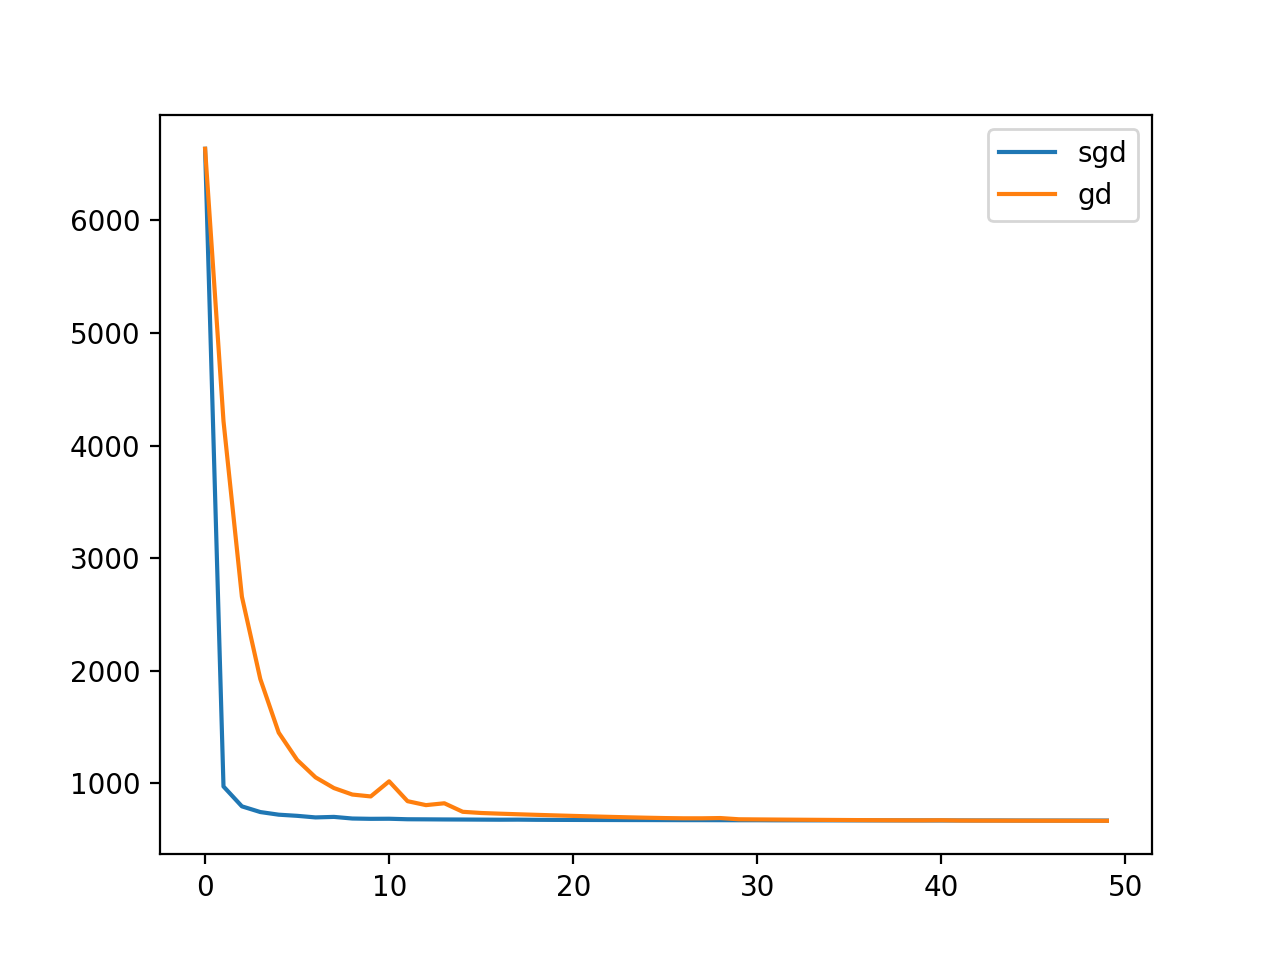

In [455]:
nextplot()
plt.plot(vz_sgd[0:50], label='sgd')
plt.plot(vz_gd[0:50], label='gd')
plt.legend()

<IPython.core.display.Javascript object>


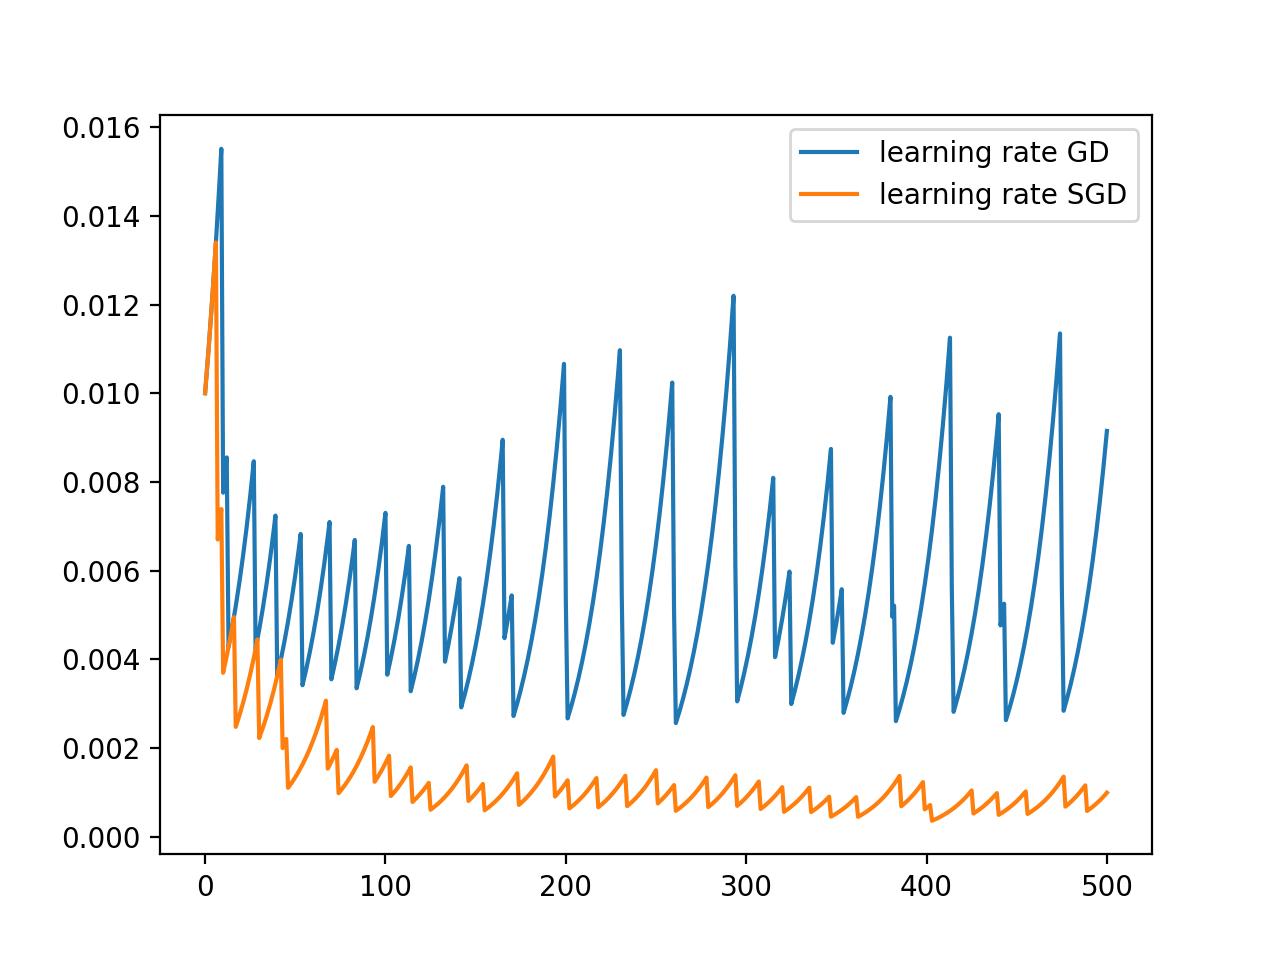

In [456]:
nextplot()
plt.plot(ez_gd, label='learning rate GD')
plt.plot(ez_sgd, label='learning rate SGD')
plt.legend()

<IPython.core.display.Javascript object>


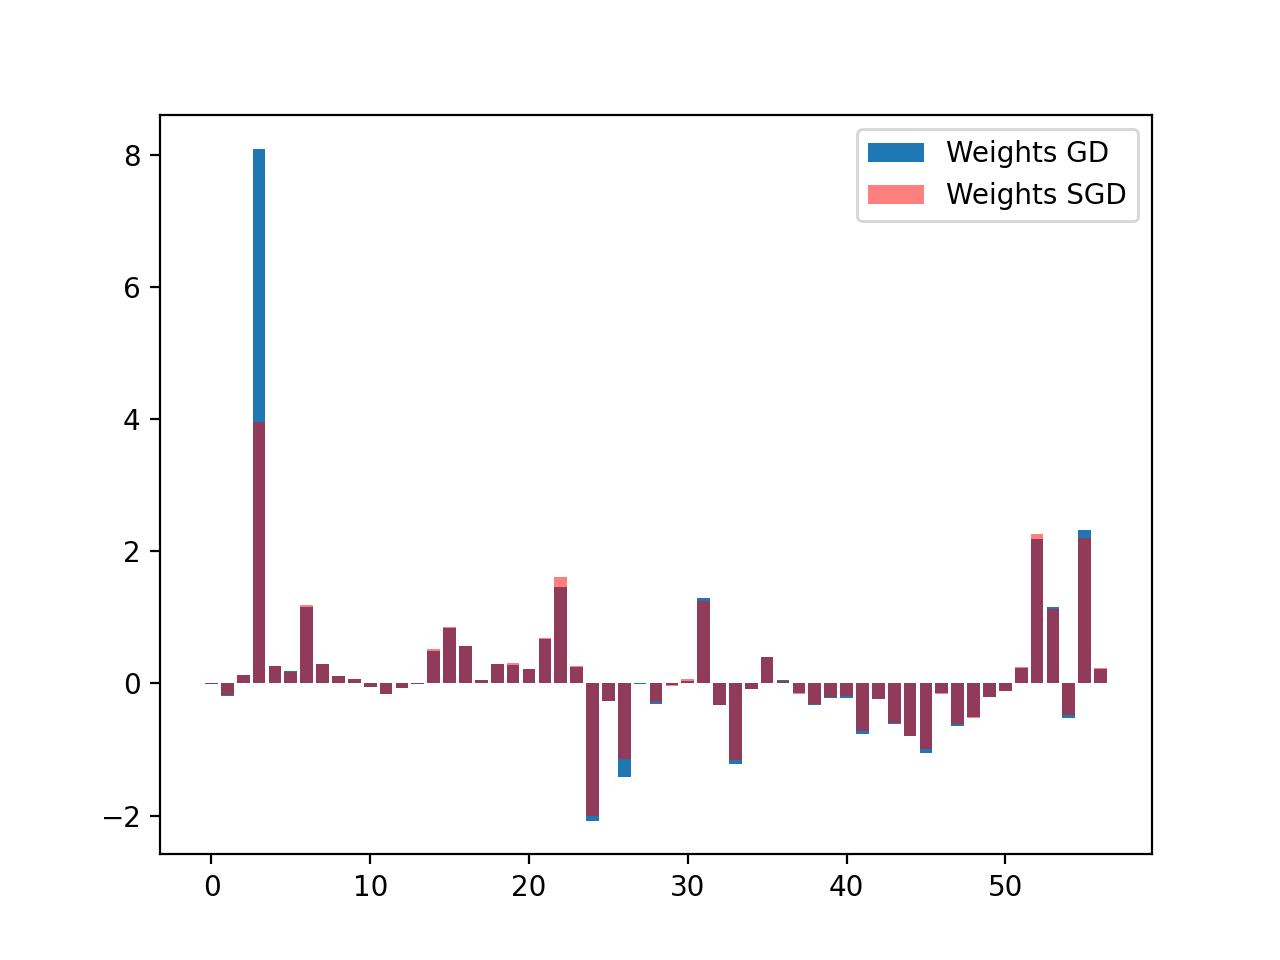

In [457]:
nextplot()
plt.bar(range(0,57), wz_gd, label='Weights GD', alpha=1)
plt.bar(range(0,57), wz_sgd, label='Weights SGD', alpha=0.5, color='red')
plt.legend()

# 3 Prediction

In [458]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    return sigma(np.dot(Xtest, w))


def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    return np.round(predict(Xtest, w))

In [459]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[887  54]
 [ 71 524]]


In [460]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



<IPython.core.display.Javascript object>


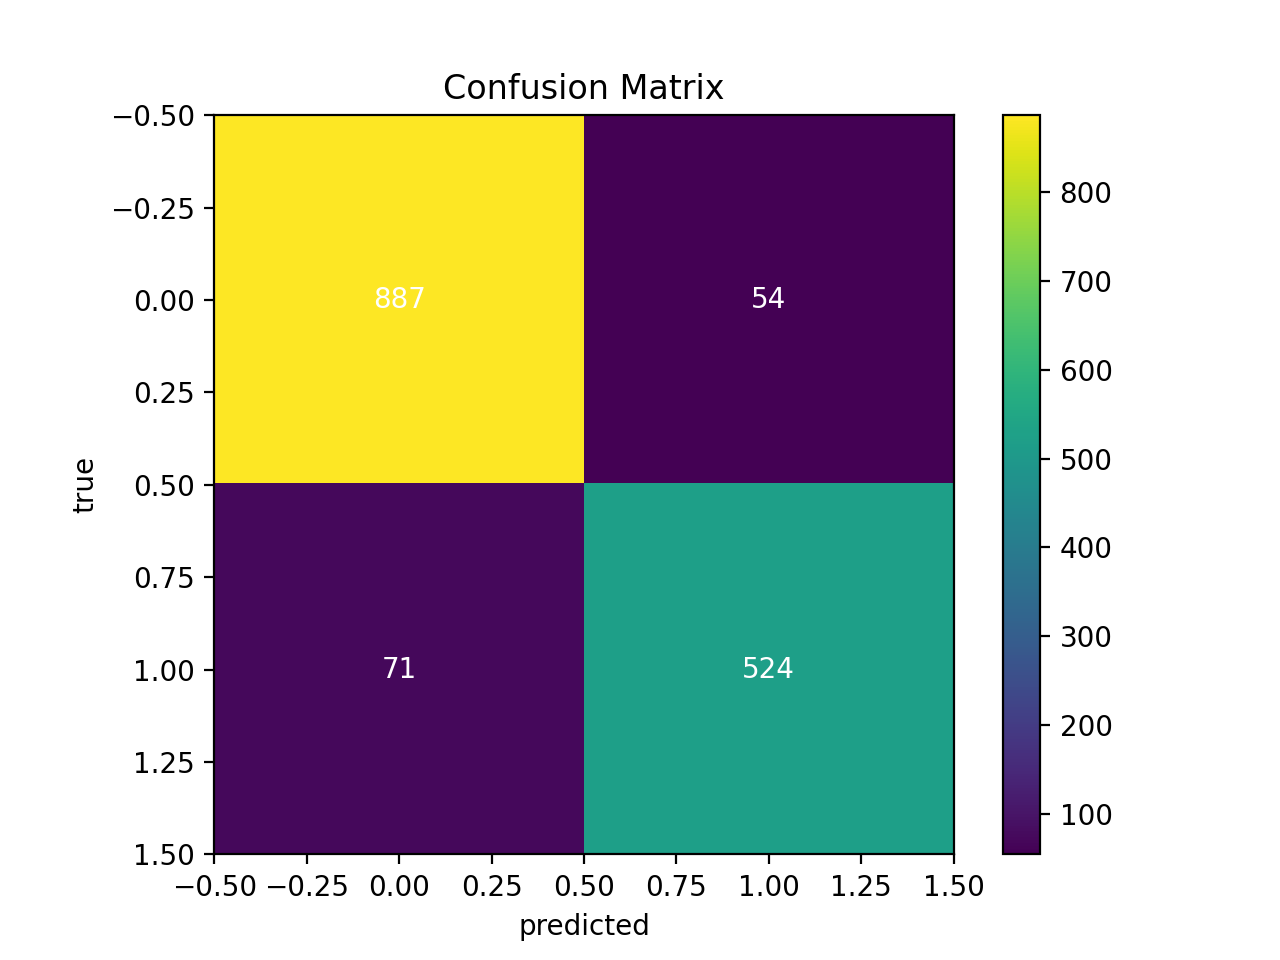

In [461]:
nextplot()
M = sklearn.metrics.confusion_matrix(ytest, ypred)
plt.imshow(M, origin="upper")
for ij, v in np.ndenumerate(M):
    i, j = ij
    plt.text(j, i, str(v), color="white", ha="center", va="center")
plt.xlabel("predicted")
plt.ylabel("true")
plt.title('Confusion Matrix')
plt.colorbar()

<IPython.core.display.Javascript object>


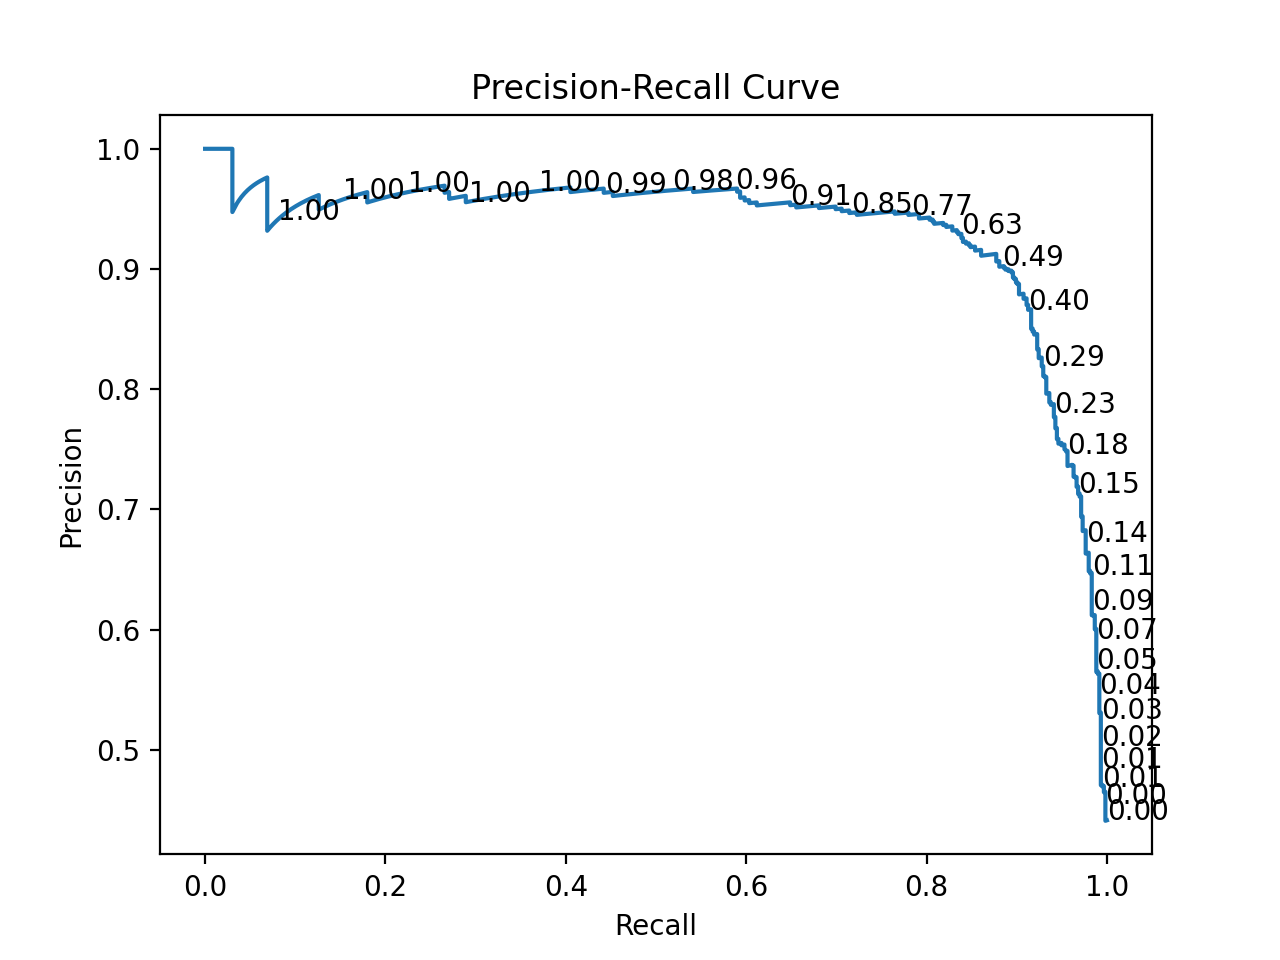

Text(0.5, 1.0, 'Precision-Recall Curve')

In [409]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 30, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve')

In [463]:
# Explore which features are considered importpant
# YOUR CODE HERE
for i in range(len(wz_gd)):
    print(str(features[i]) + ": " + str(np.exp(wz_gd[i])) + str(np.exp(wz_sgd[i]))) 

word_freq_make: 0.99117114721986990.992211542884363
word_freq_address: 0.82885361315862040.8333705565433681
word_freq_all: 1.1292206213818991.1304421772237607
word_freq_3d: 3249.502562967078652.490691053249314
word_freq_our: 1.29574546944761141.295049592080752
word_freq_over: 1.19842951336975131.1966307166842804
word_freq_remove: 3.16874569543203063.2918878371831797
word_freq_internet: 1.33682687106295721.3382737802467617
word_freq_order: 1.12022260533894171.1182313923256109
word_freq_mail: 1.06827470547653671.0637457586661565
word_freq_receive: 0.9542401985899660.9534603075950621
word_freq_will: 0.84732646478096070.8503049679493497
word_freq_people: 0.93677241885286290.9365918456323971
word_freq_report: 0.98911178815411230.9884987116160844
word_freq_addresses: 1.63889460609224711.6955516880262331
word_freq_free: 2.3249537686830522.34409473264945
word_freq_business: 1.75718004462777681.7702431700514893
word_freq_email: 1.05612840869776941.0592077672742315
word_freq_you: 1.3351126749970

In [464]:
for i in np.argsort(wz_gd):
    print(str(features[i]) + ": " + str(np.exp(wz_gd[i])) + str(np.exp(wz_sgd[i]))) 

word_freq_hp: 0.125220847409035550.1344269255548821
word_freq_george: 0.242647316590533980.31767799917138473
word_freq_415: 0.293796580182090650.3136343106711228
word_freq_edu: 0.349900577459794470.36932968183655857
word_freq_re: 0.450128656258120430.45375624485948785
word_freq_meeting: 0.463858331391656050.48797284052240014
word_freq_conference: 0.52698761739400420.5440521678102571
word_freq_project: 0.54100578854631170.5510966876431841
capital_run_length_average: 0.59584688013401350.6168564153041268
char_freq_;: 0.60281021123451860.5973159260634106
word_freq_data: 0.71986898335791090.7237892011520172
word_freq_pm: 0.72698514405288140.7306238820516223
word_freq_lab: 0.73626648966411250.757957916682663
word_freq_hpl: 0.76753194862163740.7718294401772288
word_freq_original: 0.78576032029071160.7913103593930279
word_freq_cs: 0.8041256295694520.8293185826867879
word_freq_direct: 0.80647020258706190.8114588195979868
char_freq_(: 0.81764507588162280.8126627555983862
word_freq_address: 0.828

In [465]:
#Inspecting word_freq_3d on train
len_3d = len(y[X[:,3]!=0])
print(len_3d)
sum_3d = sum(y[X[:,3]!=0])
print(sum_3d)
print(sum_3d/len_3d)

# on test
len_3dt = len(ytest[Xtest[:,3]!=0])
print(len_3dt)
sum_3dt = sum(ytest[Xtest[:,3]!=0])
print(sum_3dt)
print(sum_3dt/len_3dt)


35
29
0.8285714285714286
12
10
0.8333333333333334


# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [466]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    return np.subtract(l(y, X, w), np.dot((lambda_/2), (numpy.linalg.norm(w))**2))

In [467]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[-47066.64166782577, -47312.62381068291]

In [478]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE
    return np.subtract(dl(y, X, w), np.dot(lambda_, w))

In [479]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [470]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    def objective(w):
        return -l_l2(y, X, w, lambda_)

    def update(w, eps):
        return w + eps * dl_l2(y, X, w, lambda_) 

    return (objective, update)

In [471]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=2500)

Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

Epoch 436: f=   988.512, eps=0.000000000
Epoch 437: f=   988.512, eps=0.000000000
Epoch 438: f=   988.512, eps=0.000000000
Epoch 439: f=   988.512, eps=0.000000000
Epoch 440: f=   988.512, eps=0.000000000
Epoch 441: f=   988.512, eps=0.000000000
Epoch 442: f=   988.512, eps=0.000000000
Epoch 443: f=   988.512, eps=0.000000000
Epoch 444: f=   988.512, eps=0.000000000
Epoch 445: f=   988.512, eps=0.000000000
Epoch 446: f=   988.512, eps=0.000000000
Epoch 447: f=   988.512, eps=0.000000000
Epoch 448: f=   988.512, eps=0.000000000
Epoch 449: f=   988.512, eps=0.000000000
Epoch 450: f=   988.512, eps=0.000000000
Epoch 451: f=   988.512, eps=0.000000000
Epoch 452: f=   988.512, eps=0.000000000
Epoch 453: f=   988.512, eps=0.000000000
Epoch 454: f=   988.512, eps=0.000000000
Epoch 455: f=   988.512, eps=0.000000000
Epoch 456: f=   988.512, eps=0.000000000
Epoch 457: f=   988.512, eps=0.000000000
Epoch 458: f=   988.512, eps=0.000000000
Epoch 459: f=   988.512, eps=0.000000000
Epoch 460: f=   

Epoch 874: f=   988.512, eps=0.000000000
Epoch 875: f=   988.512, eps=0.000000000
Epoch 876: f=   988.512, eps=0.000000000
Epoch 877: f=   988.512, eps=0.000000000
Epoch 878: f=   988.512, eps=0.000000000
Epoch 879: f=   988.512, eps=0.000000000
Epoch 880: f=   988.512, eps=0.000000000
Epoch 881: f=   988.512, eps=0.000000000
Epoch 882: f=   988.512, eps=0.000000000
Epoch 883: f=   988.512, eps=0.000000000
Epoch 884: f=   988.512, eps=0.000000000
Epoch 885: f=   988.512, eps=0.000000000
Epoch 886: f=   988.512, eps=0.000000000
Epoch 887: f=   988.512, eps=0.000000000
Epoch 888: f=   988.512, eps=0.000000000
Epoch 889: f=   988.512, eps=0.000000000
Epoch 890: f=   988.512, eps=0.000000000
Epoch 891: f=   988.512, eps=0.000000000
Epoch 892: f=   988.512, eps=0.000000000
Epoch 893: f=   988.512, eps=0.000000000
Epoch 894: f=   988.512, eps=0.000000000
Epoch 895: f=   988.512, eps=0.000000000
Epoch 896: f=   988.512, eps=0.000000000
Epoch 897: f=   988.512, eps=0.000000000
Epoch 898: f=   

Epoch 1310: f=   988.512, eps=0.000000000
Epoch 1311: f=   988.512, eps=0.000000000
Epoch 1312: f=   988.512, eps=0.000000000
Epoch 1313: f=   988.512, eps=0.000000000
Epoch 1314: f=   988.512, eps=0.000000000
Epoch 1315: f=   988.512, eps=0.000000000
Epoch 1316: f=   988.512, eps=0.000000000
Epoch 1317: f=   988.512, eps=0.000000000
Epoch 1318: f=   988.512, eps=0.000000000
Epoch 1319: f=   988.512, eps=0.000000000
Epoch 1320: f=   988.512, eps=0.000000000
Epoch 1321: f=   988.512, eps=0.000000000
Epoch 1322: f=   988.512, eps=0.000000000
Epoch 1323: f=   988.512, eps=0.000000000
Epoch 1324: f=   988.512, eps=0.000000000
Epoch 1325: f=   988.512, eps=0.000000000
Epoch 1326: f=   988.512, eps=0.000000000
Epoch 1327: f=   988.512, eps=0.000000000
Epoch 1328: f=   988.512, eps=0.000000000
Epoch 1329: f=   988.512, eps=0.000000000
Epoch 1330: f=   988.512, eps=0.000000000
Epoch 1331: f=   988.512, eps=0.000000000
Epoch 1332: f=   988.512, eps=0.000000000
Epoch 1333: f=   988.512, eps=0.00

Epoch 1736: f=   988.512, eps=0.000000000
Epoch 1737: f=   988.512, eps=0.000000000
Epoch 1738: f=   988.512, eps=0.000000000
Epoch 1739: f=   988.512, eps=0.000000000
Epoch 1740: f=   988.512, eps=0.000000000
Epoch 1741: f=   988.512, eps=0.000000000
Epoch 1742: f=   988.512, eps=0.000000000
Epoch 1743: f=   988.512, eps=0.000000000
Epoch 1744: f=   988.512, eps=0.000000000
Epoch 1745: f=   988.512, eps=0.000000000
Epoch 1746: f=   988.512, eps=0.000000000
Epoch 1747: f=   988.512, eps=0.000000000
Epoch 1748: f=   988.512, eps=0.000000000
Epoch 1749: f=   988.512, eps=0.000000000
Epoch 1750: f=   988.512, eps=0.000000000
Epoch 1751: f=   988.512, eps=0.000000000
Epoch 1752: f=   988.512, eps=0.000000000
Epoch 1753: f=   988.512, eps=0.000000000
Epoch 1754: f=   988.512, eps=0.000000000
Epoch 1755: f=   988.512, eps=0.000000000
Epoch 1756: f=   988.512, eps=0.000000000
Epoch 1757: f=   988.512, eps=0.000000000
Epoch 1758: f=   988.512, eps=0.000000000
Epoch 1759: f=   988.512, eps=0.00

Epoch 2166: f=   988.512, eps=0.000000000
Epoch 2167: f=   988.512, eps=0.000000000
Epoch 2168: f=   988.512, eps=0.000000000
Epoch 2169: f=   988.512, eps=0.000000000
Epoch 2170: f=   988.512, eps=0.000000000
Epoch 2171: f=   988.512, eps=0.000000000
Epoch 2172: f=   988.512, eps=0.000000000
Epoch 2173: f=   988.512, eps=0.000000000
Epoch 2174: f=   988.512, eps=0.000000000
Epoch 2175: f=   988.512, eps=0.000000000
Epoch 2176: f=   988.512, eps=0.000000000
Epoch 2177: f=   988.512, eps=0.000000000
Epoch 2178: f=   988.512, eps=0.000000000
Epoch 2179: f=   988.512, eps=0.000000000
Epoch 2180: f=   988.512, eps=0.000000000
Epoch 2181: f=   988.512, eps=0.000000000
Epoch 2182: f=   988.512, eps=0.000000000
Epoch 2183: f=   988.512, eps=0.000000000
Epoch 2184: f=   988.512, eps=0.000000000
Epoch 2185: f=   988.512, eps=0.000000000
Epoch 2186: f=   988.512, eps=0.000000000
Epoch 2187: f=   988.512, eps=0.000000000
Epoch 2188: f=   988.512, eps=0.000000000
Epoch 2189: f=   988.512, eps=0.00

Epoch 2463: f=   988.512, eps=0.000000000
Epoch 2464: f=   988.512, eps=0.000000000
Epoch 2465: f=   988.512, eps=0.000000000
Epoch 2466: f=   988.512, eps=0.000000000
Epoch 2467: f=   988.512, eps=0.000000000
Epoch 2468: f=   988.512, eps=0.000000000
Epoch 2469: f=   988.512, eps=0.000000000
Epoch 2470: f=   988.512, eps=0.000000000
Epoch 2471: f=   988.512, eps=0.000000000
Epoch 2472: f=   988.512, eps=0.000000000
Epoch 2473: f=   988.512, eps=0.000000000
Epoch 2474: f=   988.512, eps=0.000000000
Epoch 2475: f=   988.512, eps=0.000000000
Epoch 2476: f=   988.512, eps=0.000000000
Epoch 2477: f=   988.512, eps=0.000000000
Epoch 2478: f=   988.512, eps=0.000000000
Epoch 2479: f=   988.512, eps=0.000000000
Epoch 2480: f=   988.512, eps=0.000000000
Epoch 2481: f=   988.512, eps=0.000000000
Epoch 2482: f=   988.512, eps=0.000000000
Epoch 2483: f=   988.512, eps=0.000000000
Epoch 2484: f=   988.512, eps=0.000000000
Epoch 2485: f=   988.512, eps=0.000000000
Epoch 2486: f=   988.512, eps=0.00

## 4b Effect of Prior

In [472]:
lam = [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 100, 200, 500]
results = dict()
for la in lam: 
    numpy.random.seed(0)
    w0 = np.random.normal(size=D)
    results[str(la)] = optimize(gd_l2(y, Xz, la), w0, nepochs=500)
    

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

Epoch 470: f=   655.923, eps=0.009336249
Epoch 471: f=   655.896, eps=0.009803061
Epoch 472: f=   655.868, eps=0.010293215
Epoch 473: f=   655.841, eps=0.010807875
Epoch 474: f=   655.835, eps=0.011348269
Epoch 475: f=   656.135, eps=0.005674135
Epoch 476: f=   656.301, eps=0.002837067
Epoch 477: f=   655.760, eps=0.002978921
Epoch 478: f=   655.744, eps=0.003127867
Epoch 479: f=   655.735, eps=0.003284260
Epoch 480: f=   655.725, eps=0.003448473
Epoch 481: f=   655.716, eps=0.003620897
Epoch 482: f=   655.705, eps=0.003801941
Epoch 483: f=   655.695, eps=0.003992039
Epoch 484: f=   655.684, eps=0.004191640
Epoch 485: f=   655.672, eps=0.004401222
Epoch 486: f=   655.659, eps=0.004621284
Epoch 487: f=   655.646, eps=0.004852348
Epoch 488: f=   655.633, eps=0.005094965
Epoch 489: f=   655.619, eps=0.005349713
Epoch 490: f=   655.604, eps=0.005617199
Epoch 491: f=   655.588, eps=0.005898059
Epoch 492: f=   655.571, eps=0.006192962
Epoch 493: f=   655.554, eps=0.006502610
Epoch 494: f=   

Epoch 449: f=   656.997, eps=0.007037468
Epoch 450: f=   656.978, eps=0.007389342
Epoch 451: f=   656.958, eps=0.007758809
Epoch 452: f=   656.936, eps=0.008146749
Epoch 453: f=   656.914, eps=0.008554086
Epoch 454: f=   656.891, eps=0.008981791
Epoch 455: f=   656.867, eps=0.009430880
Epoch 456: f=   656.842, eps=0.009902424
Epoch 457: f=   656.815, eps=0.010397546
Epoch 458: f=   656.787, eps=0.010917423
Epoch 459: f=   656.758, eps=0.011463294
Epoch 460: f=   656.729, eps=0.012036459
Epoch 461: f=   656.721, eps=0.012638282
Epoch 462: f=   657.104, eps=0.006319141
Epoch 463: f=   657.572, eps=0.003159570
Epoch 464: f=   656.679, eps=0.003317549
Epoch 465: f=   656.633, eps=0.003483426
Epoch 466: f=   656.619, eps=0.003657598
Epoch 467: f=   656.609, eps=0.003840478
Epoch 468: f=   656.599, eps=0.004032501
Epoch 469: f=   656.588, eps=0.004234127
Epoch 470: f=   656.577, eps=0.004445833
Epoch 471: f=   656.565, eps=0.004668125
Epoch 472: f=   656.553, eps=0.004901531
Epoch 473: f=   

Epoch 426: f=   661.881, eps=0.010104182
Epoch 427: f=   661.884, eps=0.005052091
Epoch 428: f=   661.881, eps=0.005304695
Epoch 429: f=   661.883, eps=0.002652348
Epoch 430: f=   661.847, eps=0.002784965
Epoch 431: f=   661.843, eps=0.002924213
Epoch 432: f=   661.839, eps=0.003070424
Epoch 433: f=   661.835, eps=0.003223945
Epoch 434: f=   661.830, eps=0.003385142
Epoch 435: f=   661.826, eps=0.003554400
Epoch 436: f=   661.821, eps=0.003732120
Epoch 437: f=   661.816, eps=0.003918726
Epoch 438: f=   661.810, eps=0.004114662
Epoch 439: f=   661.804, eps=0.004320395
Epoch 440: f=   661.799, eps=0.004536415
Epoch 441: f=   661.792, eps=0.004763235
Epoch 442: f=   661.786, eps=0.005001397
Epoch 443: f=   661.779, eps=0.005251467
Epoch 444: f=   661.772, eps=0.005514040
Epoch 445: f=   661.764, eps=0.005789742
Epoch 446: f=   661.757, eps=0.006079230
Epoch 447: f=   661.748, eps=0.006383191
Epoch 448: f=   661.740, eps=0.006702351
Epoch 449: f=   661.731, eps=0.007037468
Epoch 450: f=   

Epoch 402: f=   674.132, eps=0.006579263
Epoch 403: f=   674.132, eps=0.006908226
Epoch 404: f=   674.131, eps=0.007253638
Epoch 405: f=   674.131, eps=0.007616320
Epoch 406: f=   674.130, eps=0.007997136
Epoch 407: f=   674.129, eps=0.008396992
Epoch 408: f=   674.129, eps=0.008816842
Epoch 409: f=   674.128, eps=0.009257684
Epoch 410: f=   674.127, eps=0.009720568
Epoch 411: f=   674.127, eps=0.010206597
Epoch 412: f=   674.126, eps=0.010716927
Epoch 413: f=   674.127, eps=0.005358463
Epoch 414: f=   674.127, eps=0.002679232
Epoch 415: f=   674.125, eps=0.002813193
Epoch 416: f=   674.124, eps=0.002953853
Epoch 417: f=   674.124, eps=0.003101546
Epoch 418: f=   674.124, eps=0.003256623
Epoch 419: f=   674.124, eps=0.003419454
Epoch 420: f=   674.123, eps=0.003590427
Epoch 421: f=   674.123, eps=0.003769948
Epoch 422: f=   674.123, eps=0.003958445
Epoch 423: f=   674.123, eps=0.004156368
Epoch 424: f=   674.122, eps=0.004364186
Epoch 425: f=   674.122, eps=0.004582395
Epoch 426: f=   

Epoch 379: f=   682.851, eps=0.004498241
Epoch 380: f=   682.851, eps=0.004723153
Epoch 381: f=   682.851, eps=0.004959310
Epoch 382: f=   682.851, eps=0.005207276
Epoch 383: f=   682.851, eps=0.005467640
Epoch 384: f=   682.851, eps=0.005741022
Epoch 385: f=   682.851, eps=0.006028073
Epoch 386: f=   682.851, eps=0.006329476
Epoch 387: f=   682.851, eps=0.006645950
Epoch 388: f=   682.851, eps=0.006978248
Epoch 389: f=   682.851, eps=0.007327160
Epoch 390: f=   682.851, eps=0.007693518
Epoch 391: f=   682.851, eps=0.008078194
Epoch 392: f=   682.851, eps=0.008482104
Epoch 393: f=   682.851, eps=0.008906209
Epoch 394: f=   682.851, eps=0.009351519
Epoch 395: f=   682.851, eps=0.009819095
Epoch 396: f=   682.851, eps=0.010310050
Epoch 397: f=   682.851, eps=0.005155025
Epoch 398: f=   682.851, eps=0.002577512
Epoch 399: f=   682.850, eps=0.002706388
Epoch 400: f=   682.850, eps=0.002841708
Epoch 401: f=   682.850, eps=0.002983793
Epoch 402: f=   682.850, eps=0.003132983
Epoch 403: f=   

Epoch 334: f=   695.400, eps=0.009736467
Epoch 335: f=   695.400, eps=0.010223291
Epoch 336: f=   695.400, eps=0.010734455
Epoch 337: f=   695.400, eps=0.011271178
Epoch 338: f=   695.400, eps=0.005635589
Epoch 339: f=   695.400, eps=0.002817794
Epoch 340: f=   695.400, eps=0.002958684
Epoch 341: f=   695.400, eps=0.003106618
Epoch 342: f=   695.400, eps=0.003261949
Epoch 343: f=   695.400, eps=0.003425047
Epoch 344: f=   695.400, eps=0.003596299
Epoch 345: f=   695.400, eps=0.003776114
Epoch 346: f=   695.400, eps=0.003964920
Epoch 347: f=   695.400, eps=0.004163166
Epoch 348: f=   695.400, eps=0.004371324
Epoch 349: f=   695.400, eps=0.004589890
Epoch 350: f=   695.400, eps=0.004819385
Epoch 351: f=   695.400, eps=0.005060354
Epoch 352: f=   695.400, eps=0.005313372
Epoch 353: f=   695.400, eps=0.005579040
Epoch 354: f=   695.400, eps=0.005857992
Epoch 355: f=   695.400, eps=0.006150892
Epoch 356: f=   695.400, eps=0.006458437
Epoch 357: f=   695.400, eps=0.006781358
Epoch 358: f=   

Epoch 273: f=   705.529, eps=0.004597397
Epoch 274: f=   705.529, eps=0.004827267
Epoch 275: f=   705.529, eps=0.002413634
Epoch 276: f=   705.529, eps=0.002534315
Epoch 277: f=   705.529, eps=0.002661031
Epoch 278: f=   705.529, eps=0.002794083
Epoch 279: f=   705.528, eps=0.002933787
Epoch 280: f=   705.528, eps=0.003080476
Epoch 281: f=   705.528, eps=0.003234500
Epoch 282: f=   705.528, eps=0.003396225
Epoch 283: f=   705.528, eps=0.003566036
Epoch 284: f=   705.528, eps=0.003744338
Epoch 285: f=   705.528, eps=0.003931555
Epoch 286: f=   705.528, eps=0.004128133
Epoch 287: f=   705.528, eps=0.004334539
Epoch 288: f=   705.528, eps=0.004551266
Epoch 289: f=   705.528, eps=0.004778830
Epoch 290: f=   705.528, eps=0.005017771
Epoch 291: f=   705.528, eps=0.005268660
Epoch 292: f=   705.528, eps=0.005532093
Epoch 293: f=   705.528, eps=0.005808697
Epoch 294: f=   705.528, eps=0.006099132
Epoch 295: f=   705.528, eps=0.006404089
Epoch 296: f=   705.528, eps=0.006724293
Epoch 297: f=   

Epoch 212: f=   714.381, eps=0.004558710
Epoch 213: f=   714.381, eps=0.004786646
Epoch 214: f=   714.381, eps=0.002393323
Epoch 215: f=   714.381, eps=0.002512989
Epoch 216: f=   714.381, eps=0.002638638
Epoch 217: f=   714.381, eps=0.002770570
Epoch 218: f=   714.381, eps=0.002909099
Epoch 219: f=   714.381, eps=0.003054554
Epoch 220: f=   714.381, eps=0.003207282
Epoch 221: f=   714.381, eps=0.003367646
Epoch 222: f=   714.381, eps=0.003536028
Epoch 223: f=   714.381, eps=0.003712829
Epoch 224: f=   714.381, eps=0.003898471
Epoch 225: f=   714.381, eps=0.004093394
Epoch 226: f=   714.381, eps=0.004298064
Epoch 227: f=   714.381, eps=0.004512967
Epoch 228: f=   714.381, eps=0.004738616
Epoch 229: f=   714.381, eps=0.004975546
Epoch 230: f=   714.381, eps=0.005224324
Epoch 231: f=   714.381, eps=0.005485540
Epoch 232: f=   714.381, eps=0.005759817
Epoch 233: f=   714.381, eps=0.006047808
Epoch 234: f=   714.381, eps=0.006350198
Epoch 235: f=   714.381, eps=0.006667708
Epoch 236: f=   

Epoch 152: f=   722.373, eps=0.004746366
Epoch 153: f=   722.373, eps=0.004983684
Epoch 154: f=   722.373, eps=0.005232868
Epoch 155: f=   722.373, eps=0.005494512
Epoch 156: f=   722.373, eps=0.005769237
Epoch 157: f=   722.373, eps=0.006057699
Epoch 158: f=   722.373, eps=0.006360584
Epoch 159: f=   722.373, eps=0.006678613
Epoch 160: f=   722.373, eps=0.007012544
Epoch 161: f=   722.373, eps=0.007363171
Epoch 162: f=   722.373, eps=0.007731330
Epoch 163: f=   722.373, eps=0.003865665
Epoch 164: f=   722.372, eps=0.004058948
Epoch 165: f=   722.372, eps=0.004261896
Epoch 166: f=   722.372, eps=0.004474990
Epoch 167: f=   722.372, eps=0.004698740
Epoch 168: f=   722.372, eps=0.004933677
Epoch 169: f=   722.372, eps=0.005180361
Epoch 170: f=   722.372, eps=0.002590180
Epoch 171: f=   722.372, eps=0.002719689
Epoch 172: f=   722.372, eps=0.002855674
Epoch 173: f=   722.372, eps=0.002998458
Epoch 174: f=   722.372, eps=0.003148380
Epoch 175: f=   722.372, eps=0.003305799
Epoch 176: f=   

Epoch  91: f=   754.854, eps=0.004706425
Epoch  92: f=   754.853, eps=0.004941746
Epoch  93: f=   754.853, eps=0.005188834
Epoch  94: f=   754.853, eps=0.002594417
Epoch  95: f=   754.853, eps=0.002724138
Epoch  96: f=   754.853, eps=0.002860345
Epoch  97: f=   754.853, eps=0.003003362
Epoch  98: f=   754.853, eps=0.003153530
Epoch  99: f=   754.853, eps=0.003311206
Epoch 100: f=   754.853, eps=0.003476767
Epoch 101: f=   754.853, eps=0.003650605
Epoch 102: f=   754.853, eps=0.003833135
Epoch 103: f=   754.853, eps=0.004024792
Epoch 104: f=   754.853, eps=0.004226032
Epoch 105: f=   754.853, eps=0.004437333
Epoch 106: f=   754.853, eps=0.004659200
Epoch 107: f=   754.853, eps=0.004892160
Epoch 108: f=   754.853, eps=0.005136768
Epoch 109: f=   754.853, eps=0.005393606
Epoch 110: f=   754.853, eps=0.005663287
Epoch 111: f=   754.853, eps=0.005946451
Epoch 112: f=   754.853, eps=0.006243773
Epoch 113: f=   754.853, eps=0.006555962
Epoch 114: f=   754.853, eps=0.006883760
Epoch 115: f=   

Epoch  27: f=   802.145, eps=0.004031375
Epoch  28: f=   802.099, eps=0.004232944
Epoch  29: f=   802.062, eps=0.004444591
Epoch  30: f=   802.031, eps=0.004666820
Epoch  31: f=   802.005, eps=0.004900161
Epoch  32: f=   801.985, eps=0.005145169
Epoch  33: f=   801.968, eps=0.005402428
Epoch  34: f=   801.955, eps=0.005672549
Epoch  35: f=   801.945, eps=0.005956177
Epoch  36: f=   801.937, eps=0.006253986
Epoch  37: f=   801.931, eps=0.006566685
Epoch  38: f=   801.927, eps=0.006895019
Epoch  39: f=   801.932, eps=0.003447510
Epoch  40: f=   801.927, eps=0.003619885
Epoch  41: f=   801.925, eps=0.003800879
Epoch  42: f=   801.923, eps=0.003990923
Epoch  43: f=   801.924, eps=0.001995462
Epoch  44: f=   801.917, eps=0.002095235
Epoch  45: f=   801.917, eps=0.002199996
Epoch  46: f=   801.916, eps=0.002309996
Epoch  47: f=   801.916, eps=0.002425496
Epoch  48: f=   801.916, eps=0.002546771
Epoch  49: f=   801.915, eps=0.002674109
Epoch  50: f=   801.915, eps=0.002807815
Epoch  51: f=   

Epoch 463: f=   801.913, eps=0.000000000
Epoch 464: f=   801.913, eps=0.000000000
Epoch 465: f=   801.913, eps=0.000000000
Epoch 466: f=   801.913, eps=0.000000000
Epoch 467: f=   801.913, eps=0.000000000
Epoch 468: f=   801.913, eps=0.000000000
Epoch 469: f=   801.913, eps=0.000000000
Epoch 470: f=   801.913, eps=0.000000000
Epoch 471: f=   801.913, eps=0.000000000
Epoch 472: f=   801.913, eps=0.000000000
Epoch 473: f=   801.913, eps=0.000000000
Epoch 474: f=   801.913, eps=0.000000000
Epoch 475: f=   801.913, eps=0.000000000
Epoch 476: f=   801.913, eps=0.000000000
Epoch 477: f=   801.913, eps=0.000000000
Epoch 478: f=   801.913, eps=0.000000000
Epoch 479: f=   801.913, eps=0.000000000
Epoch 480: f=   801.913, eps=0.000000000
Epoch 481: f=   801.913, eps=0.000000000
Epoch 482: f=   801.913, eps=0.000000000
Epoch 483: f=   801.913, eps=0.000000000
Epoch 484: f=   801.913, eps=0.000000000
Epoch 485: f=   801.913, eps=0.000000000
Epoch 486: f=   801.913, eps=0.000000000
Epoch 487: f=   

Epoch 399: f=   988.512, eps=0.000000000
Epoch 400: f=   988.512, eps=0.000000000
Epoch 401: f=   988.512, eps=0.000000000
Epoch 402: f=   988.512, eps=0.000000000
Epoch 403: f=   988.512, eps=0.000000000
Epoch 404: f=   988.512, eps=0.000000000
Epoch 405: f=   988.512, eps=0.000000000
Epoch 406: f=   988.512, eps=0.000000000
Epoch 407: f=   988.512, eps=0.000000000
Epoch 408: f=   988.512, eps=0.000000000
Epoch 409: f=   988.512, eps=0.000000000
Epoch 410: f=   988.512, eps=0.000000000
Epoch 411: f=   988.512, eps=0.000000000
Epoch 412: f=   988.512, eps=0.000000000
Epoch 413: f=   988.512, eps=0.000000000
Epoch 414: f=   988.512, eps=0.000000000
Epoch 415: f=   988.512, eps=0.000000000
Epoch 416: f=   988.512, eps=0.000000000
Epoch 417: f=   988.512, eps=0.000000000
Epoch 418: f=   988.512, eps=0.000000000
Epoch 419: f=   988.512, eps=0.000000000
Epoch 420: f=   988.512, eps=0.000000000
Epoch 421: f=   988.512, eps=0.000000000
Epoch 422: f=   988.512, eps=0.000000000
Epoch 423: f=   

Epoch 339: f=  1108.946, eps=0.000000020
Epoch 340: f=  1108.946, eps=0.000000021
Epoch 341: f=  1108.946, eps=0.000000022
Epoch 342: f=  1108.946, eps=0.000000023
Epoch 343: f=  1108.946, eps=0.000000024
Epoch 344: f=  1108.946, eps=0.000000025
Epoch 345: f=  1108.946, eps=0.000000026
Epoch 346: f=  1108.946, eps=0.000000028
Epoch 347: f=  1108.946, eps=0.000000029
Epoch 348: f=  1108.946, eps=0.000000031
Epoch 349: f=  1108.946, eps=0.000000032
Epoch 350: f=  1108.946, eps=0.000000034
Epoch 351: f=  1108.946, eps=0.000000035
Epoch 352: f=  1108.946, eps=0.000000037
Epoch 353: f=  1108.946, eps=0.000000039
Epoch 354: f=  1108.946, eps=0.000000041
Epoch 355: f=  1108.946, eps=0.000000043
Epoch 356: f=  1108.946, eps=0.000000045
Epoch 357: f=  1108.946, eps=0.000000047
Epoch 358: f=  1108.946, eps=0.000000050
Epoch 359: f=  1108.946, eps=0.000000052
Epoch 360: f=  1108.946, eps=0.000000055
Epoch 361: f=  1108.946, eps=0.000000058
Epoch 362: f=  1108.946, eps=0.000000060
Epoch 363: f=  1

Epoch 279: f=  1304.383, eps=0.000000399
Epoch 280: f=  1304.383, eps=0.000000419
Epoch 281: f=  1304.383, eps=0.000000440
Epoch 282: f=  1304.383, eps=0.000000462
Epoch 283: f=  1304.383, eps=0.000000485
Epoch 284: f=  1304.383, eps=0.000000509
Epoch 285: f=  1304.383, eps=0.000000534
Epoch 286: f=  1304.383, eps=0.000000561
Epoch 287: f=  1304.383, eps=0.000000589
Epoch 288: f=  1304.383, eps=0.000000619
Epoch 289: f=  1304.383, eps=0.000000650
Epoch 290: f=  1304.383, eps=0.000000682
Epoch 291: f=  1304.383, eps=0.000000716
Epoch 292: f=  1304.383, eps=0.000000752
Epoch 293: f=  1304.383, eps=0.000000790
Epoch 294: f=  1304.383, eps=0.000000829
Epoch 295: f=  1304.383, eps=0.000000871
Epoch 296: f=  1304.383, eps=0.000000914
Epoch 297: f=  1304.383, eps=0.000000960
Epoch 298: f=  1304.383, eps=0.000001008
Epoch 299: f=  1304.383, eps=0.000001058
Epoch 300: f=  1304.383, eps=0.000001111
Epoch 301: f=  1304.383, eps=0.000001167
Epoch 302: f=  1304.383, eps=0.000001225
Epoch 303: f=  1

<IPython.core.display.Javascript object>


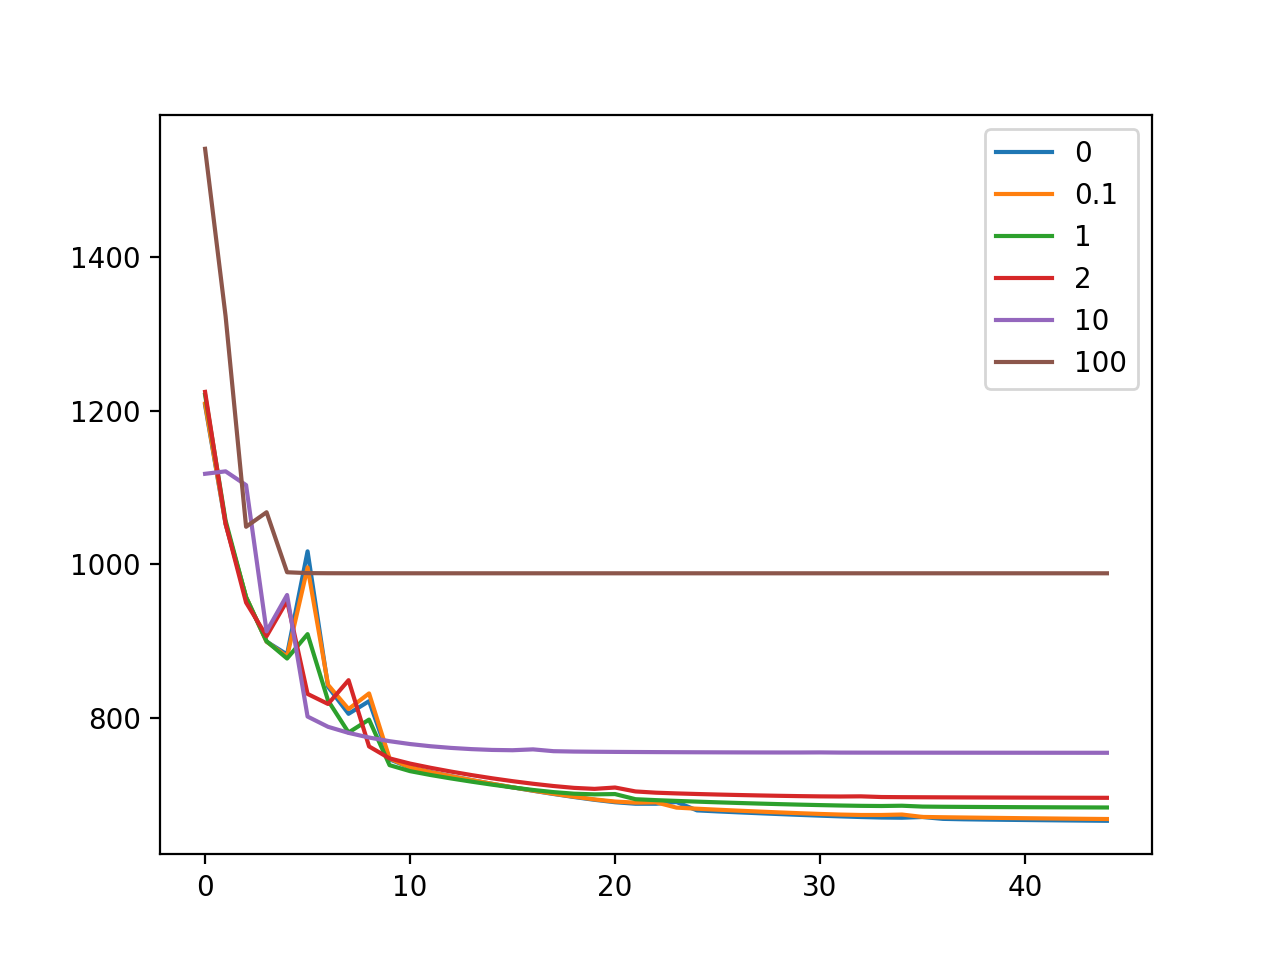

In [473]:
# 0 = feature weights
# 1 = NLL
# 2 = learning rate
nextplot()
plt.plot(results['0'][1][5:50], label='0')
#plt.plot(results['0.01'][1][5:50])
plt.plot(results['0.1'][1][5:50], label='0.1')
#plt.plot(results['0.5'][1][5:50])
plt.plot(results['1'][1][5:50], label='1')
plt.plot(results['2'][1][5:50], label='2')
#plt.plot(results['3'][1][5:50])
#plt.plot(results['4'][1][5:50])
#plt.plot(results['5'][1][5:50])
plt.plot(results['10'][1][5:50], label='10')
#plt.plot(results['20'][1][5:50])
plt.plot(results['100'][1][5:50], label='100')
#plt.plot(results['200'][1][5:50])
plt.legend()

In [474]:
# final NLL function values after 500 epochs for all 
for k, v in results.items(): 
    print("lambda " + k +  ": " + str(v[1][-1]))

lambda 0: 655.4134964699455
lambda 0.01: 656.1869767255794
lambda 0.1: 661.3584589394447
lambda 0.5: 674.1008281100459
lambda 1: 682.8492956819674
lambda 2: 695.3995518029757
lambda 3: 705.5283790137129
lambda 4: 714.3804990993457
lambda 5: 722.3720587338802
lambda 10: 754.8524204027973
lambda 20: 801.9128109439285
lambda 100: 988.511839602703
lambda 200: 1108.9460399053748
lambda 500: 1304.3834102975852


In [475]:
# test data NLL
for la in lam:
    print("lambda " + str(la) + ": " + str(-l_l2(ytest, Xtestz, results[str(la)][0], la)))

lambda 0: 427.34420041737377
lambda 0.01: 428.0095551727046
lambda 0.1: 432.1549436241506
lambda 0.5: 441.7501659024031
lambda 1: 447.8271504274655
lambda 2: 456.2726116351989
lambda 3: 462.82776004749564
lambda 4: 468.3523640733624
lambda 5: 473.2224377408319
lambda 10: 492.75373107304523
lambda 20: 521.0334296728165
lambda 100: 632.2421513404563
lambda 200: 701.367391485431
lambda 500: 805.9926345152135


In [476]:
# accuracy
for la in lam: 
    print("lambda: " + str(la))
    yh = predict(Xtestz, results[str(la)][0])
    yp = classify(Xtestz, results[str(la)][0])
    metrics = sklearn.metrics.classification_report(ytest, yp, output_dict=True)
    print("accuracy: " + str(metrics['accuracy']) + "\n")
    

lambda: 0
accuracy: 0.9186197916666666

lambda: 0.01
accuracy: 0.9186197916666666

lambda: 0.1
accuracy: 0.91796875

lambda: 0.5
accuracy: 0.91796875

lambda: 1
accuracy: 0.9186197916666666

lambda: 2
accuracy: 0.91796875

lambda: 3
accuracy: 0.9192708333333334

lambda: 4
accuracy: 0.919921875

lambda: 5
accuracy: 0.919921875

lambda: 10
accuracy: 0.919921875

lambda: 20
accuracy: 0.9173177083333334

lambda: 100
accuracy: 0.9166666666666666

lambda: 200
accuracy: 0.9114583333333334

lambda: 500
accuracy: 0.9075520833333334



## 4c Composition of Weight Vector

<IPython.core.display.Javascript object>


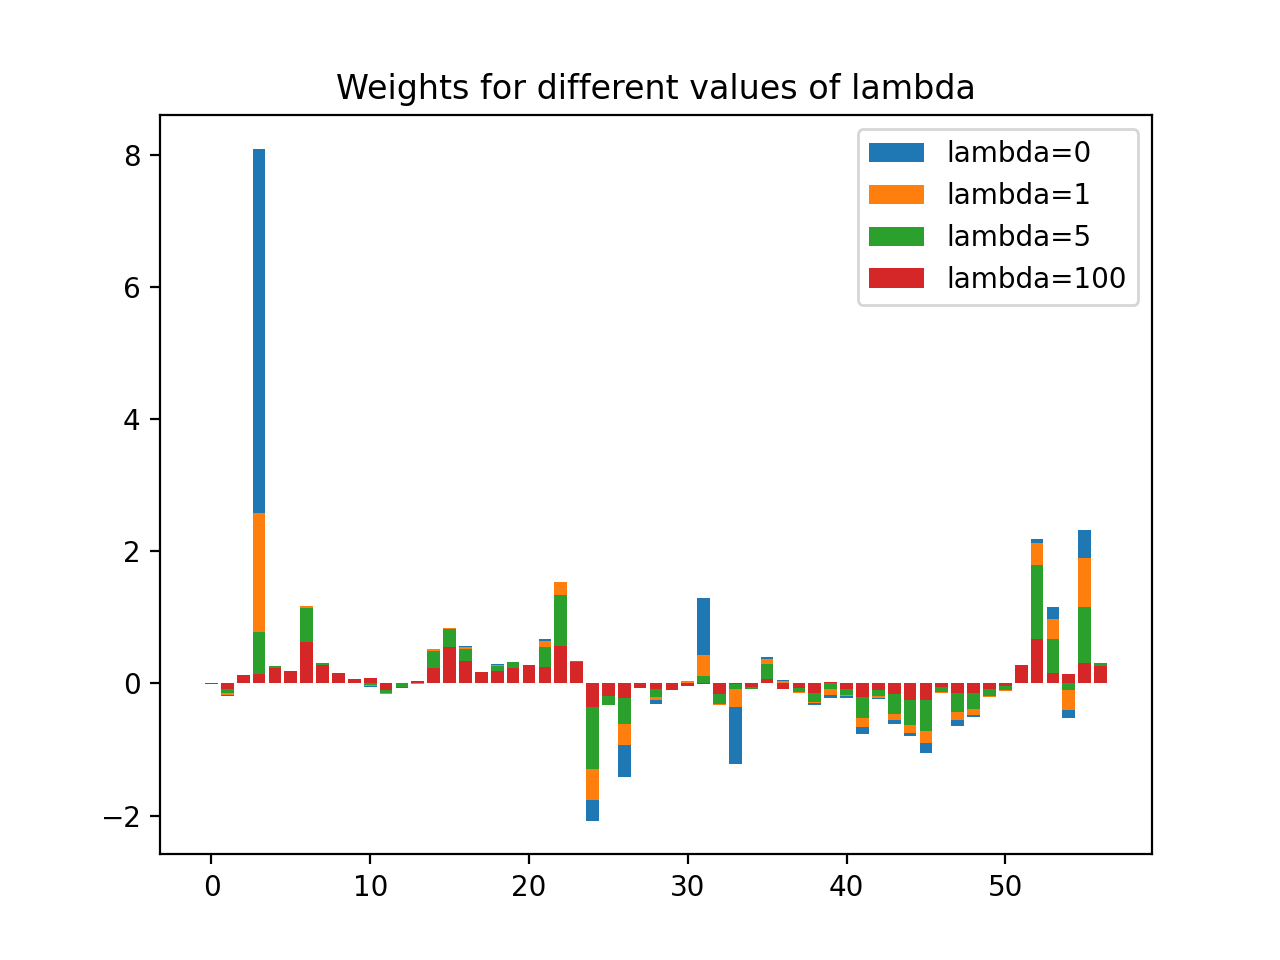

In [477]:
nextplot()
plt.bar(range(D),results['0'][0], label='lambda=0')
plt.bar(range(D),results['1'][0], label='lambda=1')
plt.bar(range(D),results['5'][0], label='lambda=5')
plt.bar(range(D),results['100'][0], label='lambda=100')
plt.title("Weights for different values of lambda")
plt.legend()

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [426]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

ModuleNotFoundError: No module named 'torch'

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)